In [1]:
cd /Users/bastus/Desktop/Forschungsprojekt/genimpro

/Users/bastus/Desktop/Forschungsprojekt/genimpro


In [2]:
%run importwrapper.py
%pylab inline

/Library/Python/2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [3]:
allPhenotypesDicts = []
soundcellIDs = []

for recordingID in genimpro.recordings.listRecodings():
    recordingDetails = genimpro.recordings.getRecordingDetails(recordingID)
    
    for track in recordingDetails[4]:
        try:
            ids,phenotypes,durations = genimpro.recordings.getPhenotypesForTrack(track)
            if phenotypes == None: continue
            if type(phenotypes) is list:
                allPhenotypesDicts.extend(phenotypes)
                soundcellIDs.extend(ids)
        except TypeError:
            continue

In [4]:
len(allPhenotypesDicts)

16109

In [5]:
trackIDs=[]

for recordingID in genimpro.recordings.listRecodings():
    recordingDetails = genimpro.recordings.getRecordingDetails(recordingID)
    
    for track in recordingDetails[4]:
        phenotypes = genimpro.recordings.getPhenotypesForTrack(track)
        if phenotypes == None: continue
        #print track[3]
        for i,phenotype in enumerate(phenotypes):
            trackIDs.append(track[3])


In [6]:
phenotypeArray = []
keylist = allPhenotypesDicts[0].keys()
keylist.sort()
pprint(keylist)

['Density',
 'Detuning',
 'DynamicComplexity',
 'DynamicGlobalLoudness',
 'DynamicKurtosis',
 'DynamicSkewness',
 'DynamicSpread',
 'FollowingRest',
 'HPCP 0',
 'HPCP 1',
 'HPCP 10',
 'HPCP 11',
 'HPCP 2',
 'HPCP 3',
 'HPCP 4',
 'HPCP 5',
 'HPCP 6',
 'HPCP 7',
 'HPCP 8',
 'HPCP 9',
 'HarmonicSpread',
 'Interval 0',
 'Interval 1',
 'Interval 10',
 'Interval 11',
 'Interval 2',
 'Interval 3',
 'Interval 4',
 'Interval 5',
 'Interval 6',
 'Interval 7',
 'Interval 8',
 'Interval 9',
 'MelodicComplexity',
 'MelodicRoot',
 'MelodicShape',
 'MelodicSpread',
 'RhythmicComplexity',
 'RhythmicFlatness',
 'RhythmicStability',
 'RhythmicTempo',
 'RhythmicUniformity',
 'SpectralCentroid',
 'SpectralFlux',
 'SpectralInharmonicity',
 'SpectralKurtosis',
 'SpectralRoughness',
 'ZeroCrossingRate']


In [7]:
for phenotypeDict in allPhenotypesDicts:
    sortedVect = []
    for key in keylist:
        sortedVect.append(phenotypeDict[key])
    phenotypeArray.append(sortedVect)

In [8]:
allPhenotypesVect = np.asarray(phenotypeArray)

In [9]:
allPhenotypesVect[0]

array([  1.78241321e-02,   2.38168602e-01,   4.05950392e-01,
         6.18682015e-01,  -3.68648767e-01,   1.07530653e-01,
         4.14850014e-01,   1.38133787e+00,   1.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   3.00000000e+00,
         1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         5.00000000e+00,   0.00000000e+00,   4.18606453e+01,
         3.60001373e+00,   4.00000000e+00,   8.83099198e-01,
         2.25293875e-01,   1.39674835e+02,   2.56326407e-01,
         4.35511188e-01,   4.79455324e-02,   5.20893323e-01,
         3.96824052e-01,   5.28665561e-01,   7.38386119e-01])

In [10]:
where_are_NaNs = np.isnan(allPhenotypesVect)
allPhenotypesVect[where_are_NaNs] = 0

In [11]:
dataByDimension = []

for dimension in range(0,len(allPhenotypesVect[0]-1)):
    dataByDimension.append([allPhenotypesVect[i][dimension] for i in range(0,len(allPhenotypesVect)-1)])

In [12]:
import itertools

In [13]:
if 0 == 1:
    for j,okey in enumerate(keylist):
        fig = plt.figure(figsize=(30, 25), dpi=300)
        fig.suptitle(okey,fontsize=24)
        for i,key in enumerate(keylist):
            ax = fig.add_subplot(5,6,i)
            ax.set_xlabel(okey)
            ax.set_ylabel(key)
            ax.scatter(allPhenotypesVect[:,j],allPhenotypesVect[:,i],s=0.5,alpha=0.25)
        fig.savefig("%s.png" % (okey),dpi=300)
        plt.show()

In [14]:
alldata = np.vstack((dataByDimension[12:14]))
#alldata = np.vstack((allPhenotypesVect[:,12:15]))
print alldata
alldataPoints = np.hstack(alldata)
len(alldataPoints)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 1.  1.  1. ...,  0.  0.  0.]]


32216

In [15]:
keylist

['Density',
 'Detuning',
 'DynamicComplexity',
 'DynamicGlobalLoudness',
 'DynamicKurtosis',
 'DynamicSkewness',
 'DynamicSpread',
 'FollowingRest',
 'HPCP 0',
 'HPCP 1',
 'HPCP 10',
 'HPCP 11',
 'HPCP 2',
 'HPCP 3',
 'HPCP 4',
 'HPCP 5',
 'HPCP 6',
 'HPCP 7',
 'HPCP 8',
 'HPCP 9',
 'HarmonicSpread',
 'Interval 0',
 'Interval 1',
 'Interval 10',
 'Interval 11',
 'Interval 2',
 'Interval 3',
 'Interval 4',
 'Interval 5',
 'Interval 6',
 'Interval 7',
 'Interval 8',
 'Interval 9',
 'MelodicComplexity',
 'MelodicRoot',
 'MelodicShape',
 'MelodicSpread',
 'RhythmicComplexity',
 'RhythmicFlatness',
 'RhythmicStability',
 'RhythmicTempo',
 'RhythmicUniformity',
 'SpectralCentroid',
 'SpectralFlux',
 'SpectralInharmonicity',
 'SpectralKurtosis',
 'SpectralRoughness',
 'ZeroCrossingRate']

In [16]:
filteredKeylist = [k for k in keylist if ((k[0:8] != "Interval") & (k[0:4] != "HPCP"))]

In [17]:
filteredKeylist

['Density',
 'Detuning',
 'DynamicComplexity',
 'DynamicGlobalLoudness',
 'DynamicKurtosis',
 'DynamicSkewness',
 'DynamicSpread',
 'FollowingRest',
 'HarmonicSpread',
 'MelodicComplexity',
 'MelodicRoot',
 'MelodicShape',
 'MelodicSpread',
 'RhythmicComplexity',
 'RhythmicFlatness',
 'RhythmicStability',
 'RhythmicTempo',
 'RhythmicUniformity',
 'SpectralCentroid',
 'SpectralFlux',
 'SpectralInharmonicity',
 'SpectralKurtosis',
 'SpectralRoughness',
 'ZeroCrossingRate']

In [18]:
clusterGroups=[["SpectralCentroid","ZeroCrossingRate"],["SpectralInharmonicity","SpectralRoughness"],
               ["Density",'SpectralKurtosis','SpectralFlux'],
                ["Density","RhythmicComplexity","RhythmicFlatness","RhythmicStability","RhythmicTempo","RhythmicUniformity"],
                ["DynamicComplexity","DynamicGlobalLoudness","DynamicKurtosis","DynamicSkewness","DynamicSpread"],
                ["MelodicComplexity","MelodicSpread","MelodicRoot",'MelodicShape'],
                ["HarmonicSpread","HPCP 0","HPCP 1","HPCP 2","HPCP 3","HPCP 4","HPCP 5","HPCP 6","HPCP 7","HPCP 8","HPCP 9","HPCP 10","HPCP 11"],
                ["Interval 0","Interval 1","Interval 2","Interval 3","Interval 4","Interval 5","Interval 6","Interval 7","Interval 8","Interval 9","Interval 10","Interval 11"]
                ]

In [19]:
import simplejson
def saveResults(groupResults):
    
    f = open('clusterGroups.txt', 'w')
    simplejson.dump(groupResults, f)
    f.close()

In [20]:
testedClustergroups = []
f = open('clusterGroups.txt', 'r')
testedClustergroups=simplejson.load(f)
f.close()

In [21]:
def estimateClusters(X,minBin=20,plot=0):
    #X = allPhenotypesVect[:,0:11]
    clustersWithPoints = []
    from sklearn.cluster import MeanShift, estimate_bandwidth
    from sklearn.datasets.samples_generator import make_blobs

    bandwidth = estimate_bandwidth(X,n_samples=5000,quantile=0.03)# quantile=0.1, n_samples=5000)
    #bandwidth=bandwidth, bin_seeding=True, 
    ms = MeanShift(bandwidth=bandwidth,bin_seeding=True,min_bin_freq=minBin,n_jobs=-1)
    ms.fit(X)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_

    labels_unique = np.unique(labels)
    n_clusters_ = len(labels_unique)
    
    sortedData = []
    
    for k in range(n_clusters_):
        my_members = labels == k
        print len(X[my_members])
        sortedData.append(X[my_members])
    
    if n_clusters_>=2:
        if len(sortedData[0])/len(sortedData[0])>2.0:
            return
    
    print("number of estimated clusters : %d" % n_clusters_)
    
    
    if (n_clusters_>=2) & (plot==1):
        import matplotlib.pyplot as plt
        from itertools import cycle

        plt.figure(1)
        plt.clf()

        colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
        for k, col in zip(range(n_clusters_), colors):
            my_members = labels == k
            cluster_center = cluster_centers[k]
            
            plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
            plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
                     markeredgecolor='k', markersize=14)
        plt.title('Estimated number of clusters: %d' % n_clusters_)
        plt.show()
    
    return sortedData, labels

In [22]:
def findClusters(geneCluster):
    clusterData = []
    for item in geneCluster:
        clusterData.append(allPhenotypesVect[:,keylist.index(item)])

    clusterData = np.asarray(clusterData)

    sortedData,labels = estimateClusters(clusterData.T,minBin=15)

    return (geneCluster,len(sortedData))

In [23]:
groupToTest = []
testedGroupsKeys = [list(i[0]) for i in testedClustergroups]

for group in itertools.combinations(filteredKeylist,2):
    groupToTest.append(group)

#groupedKeys = [k for k in keylist if k[0:4] == "HPCP"]# ) & (k[0:4] != "HPCP"))]

#for key in filteredKeylist:
#    groupToTest.append(groupedKeys + [key])

#groupToTest = [groupedKeys]

print len(groupToTest)
print ""

for geneCluster in groupToTest:
    geneCluster = list(geneCluster)
    print geneCluster
    
    if list(geneCluster) not in testedGroupsKeys:
        results = findClusters(geneCluster)
        testedClustergroups.append(results)
    else:
        print "Skip"
    
    
    print "---"
    
    saveResults(testedClustergroups)

276

['Density', 'Detuning']
Skip
---
['Density', 'DynamicComplexity']
Skip
---
['Density', 'DynamicGlobalLoudness']
Skip
---
['Density', 'DynamicKurtosis']
Skip
---
['Density', 'DynamicSkewness']
Skip
---
['Density', 'DynamicSpread']
Skip
---
['Density', 'FollowingRest']
Skip
---
['Density', 'HarmonicSpread']
Skip
---
['Density', 'MelodicComplexity']
Skip
---
['Density', 'MelodicRoot']
Skip
---
['Density', 'MelodicShape']
Skip
---
['Density', 'MelodicSpread']
Skip
---
['Density', 'RhythmicComplexity']
Skip
---
['Density', 'RhythmicFlatness']
Skip
---
['Density', 'RhythmicStability']
Skip
---
['Density', 'RhythmicTempo']
Skip
---
['Density', 'RhythmicUniformity']
Skip
---
['Density', 'SpectralCentroid']
Skip
---
['Density', 'SpectralFlux']
Skip
---
['Density', 'SpectralInharmonicity']
Skip
---
['Density', 'SpectralKurtosis']
Skip
---
['Density', 'SpectralRoughness']
Skip
---
['Density', 'ZeroCrossingRate']
Skip
---
['Detuning', 'DynamicComplexity']
Skip
---
['Detuning', 'DynamicGlobalL

In [24]:
validGroups = testedClustergroups[0:327]
print len(validGroups)
validGroups = [g[0] for g in validGroups if g[1]>1]
print len(validGroups)

327
298


In [25]:
from itertools import cycle
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')

In [26]:
from sklearn import mixture

def clusterInGroups(clusterGroups,plot=0,minBin=15):
    clusterCentersForClusterGroups=[]
    modelForClusterGroups=[]
    genotypeComponents = []
    
    variants = []

    for i,geneCluster in enumerate(clusterGroups):
        clusterData = []
        for item in geneCluster:
            clusterData.append(allPhenotypesVect[:,keylist.index(item)])
        print geneCluster

        clusterData = np.asarray(clusterData)
        transformedClusterData = clusterData.T
        sortedData,labels = estimateClusters(transformedClusterData,minBin=minBin)
        
        labels_unique = np.unique(labels)
        n_clusters = len(labels_unique)
        
        variants.append(n_clusters)
        
        for k in range(n_clusters):
            members = labels == k
            sortedData.append(transformedClusterData[members])

        if plot==1:
 
            #plt.xlabel(geneCluster[0])
            #plt.ylabel(geneCluster[1])

            #ax = fig.add_subplot(5,6,i+1)
            plt.xlabel(geneCluster[0])
            plt.ylabel(geneCluster[1])
        
            for k, col in zip(range(n_clusters), colors):
                my_members = labels == k    
                plt.plot(transformedClusterData[my_members, 0], transformedClusterData[my_members, 1], col + '.')
            #plt.title(geneCluster)
            fig.savefig(geneCluster[0] +"_"+geneCluster[1] +".pdf", bbox_inches='tight', pad_inches=0.0)            
            #plt.show()
            
        genotypeComponents.append(labels)
        
    return (variants,genotypeComponents)
        
    print labels

    gmm = mixture.GMM(n_components=n_clusters)
    gmm.fit(clusterData.T)
    cluster_membership = gmm.predict(clusterData.T)
    print cluster_membership
    genotypeComponents.append(cluster_membership)
    clusterCentersForClusterGroups.append(gmm.means_)
    modelForClusterGroups.append(gmm)


    for k, col in zip(range(n_clusters), colors):
        my_members = cluster_membership == k   
        plt.plot(transformedClusterData[my_members, 0], transformedClusterData[my_members, 1], col + '.')
    plt.title('EM')
    plt.show()        
        
        
    
    return (clusterCentersForClusterGroups, modelForClusterGroups, genotypeComponents)
    

['RhythmicStability', 'DynamicGlobalLoudness']
3553
1296
1307
2678
3879
1150
1222
815
209
number of estimated clusters : 9


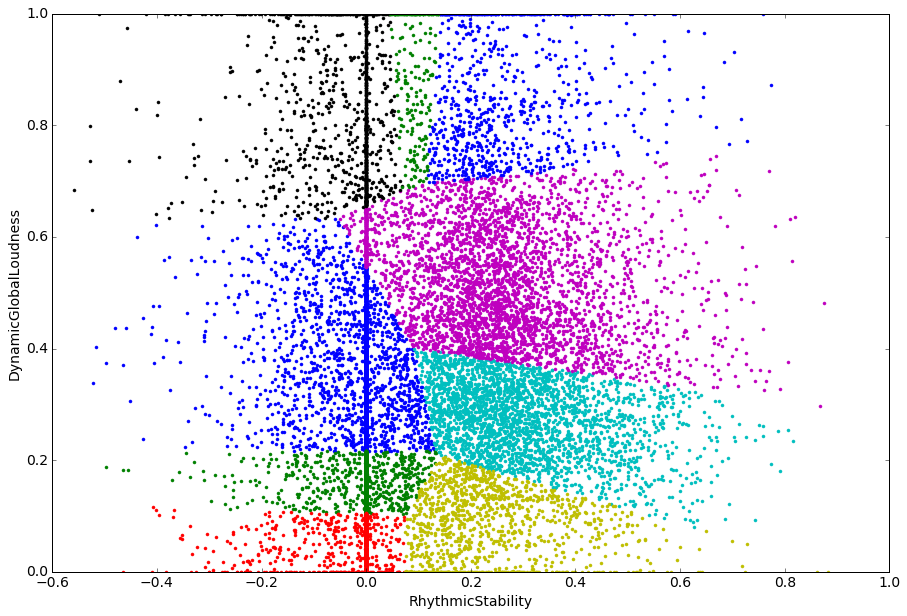

In [27]:
matplotlib.rc('font', size=14)
fig = plt.figure(figsize=(15, 10), dpi=300)   
clusterInGroups([['RhythmicStability', 'DynamicGlobalLoudness']],plot=1,minBin=20)
plt.show()  

In [28]:
variants, genotypeComponents = clusterInGroups(validGroups)

['Density', 'DynamicGlobalLoudness']
5791
893
918
1220
1266
297
3281
594
901
272
254
422
number of estimated clusters : 12
['Density', 'DynamicKurtosis']
13389
1603
306
200
93
73
63
69
59
31
223
number of estimated clusters : 11
['Density', 'DynamicSkewness']
5649
4733
2639
1351
1214
133
215
61
42
72
number of estimated clusters : 10
['Density', 'FollowingRest']
12584
527
2104
315
150
90
291
48
number of estimated clusters : 8
['Density', 'HarmonicSpread']
6484
5464
1900
1415
390
276
103
77
number of estimated clusters : 8
['Density', 'MelodicComplexity']
2235
1998
1707
1476
1398
1227
1051
803
672
649
595
443
337
294
246
193
142
129
105
87
56
50
42
36
24
24
18
72
number of estimated clusters : 28
['Density', 'MelodicRoot']
3947
2302
2322
1532
1142
930
452
746
418
709
395
593
233
212
176
number of estimated clusters : 15
['Density', 'MelodicShape']
14784
679
117
82
83
75
256
33
number of estimated clusters : 8
['Density', 'MelodicSpread']
4772
3398
1393
1299
667
839
410
406
241
274
216


/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' inst

6484
1691
941
1010
761
638
634
436
390
349
241
212
165
122
103
106
96
89
87
86
111
102
71
70
62
67
59
50
48
58
60
53
75
42
50
47
47
49
36
59
41
48
32
37
33
32
29
number of estimated clusters : 47
['Interval 0', 'Interval 1', 'Interval 10', 'Interval 11', 'Interval 2', 'Interval 3', 'Interval 4', 'Interval 5', 'Interval 6', 'Interval 7', 'Interval 8', 'Interval 9', 'Detuning']


/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' inst

6484
1691
1003
938
752
641
618
436
369
341
208
200
157
125
101
115
96
90
142
91
91
80
71
69
70
63
59
55
55
76
56
55
67
45
45
47
37
38
36
40
43
42
38
35
32
32
24
25
26
38
21
number of estimated clusters : 51
['Interval 0', 'Interval 1', 'Interval 10', 'Interval 11', 'Interval 2', 'Interval 3', 'Interval 4', 'Interval 5', 'Interval 6', 'Interval 7', 'Interval 8', 'Interval 9', 'DynamicComplexity']


/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' inst

6484
1691
1042
954
757
666
654
441
387
390
248
266
182
134
101
94
108
96
94
93
128
82
76
75
71
69
88
62
65
53
68
68
49
50
49
43
55
38
38
number of estimated clusters : 39
['Interval 0', 'Interval 1', 'Interval 10', 'Interval 11', 'Interval 2', 'Interval 3', 'Interval 4', 'Interval 5', 'Interval 6', 'Interval 7', 'Interval 8', 'Interval 9', 'DynamicGlobalLoudness']


/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' inst

6484
1691
1043
946
771
666
656
471
388
391
268
260
160
130
97
95
93
97
86
124
101
71
88
82
77
53
62
77
66
74
56
73
50
54
64
56
36
52
number of estimated clusters : 38
['Interval 0', 'Interval 1', 'Interval 10', 'Interval 11', 'Interval 2', 'Interval 3', 'Interval 4', 'Interval 5', 'Interval 6', 'Interval 7', 'Interval 8', 'Interval 9', 'DynamicKurtosis']


/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' inst

5514
1507
910
811
639
549
504
414
311
316
234
221
133
268
104
81
88
106
92
348
98
81
848
81
57
72
55
370
360
61
51
59
62
360
74
50
48
38
46
47
41
number of estimated clusters : 41
['Interval 0', 'Interval 1', 'Interval 10', 'Interval 11', 'Interval 2', 'Interval 3', 'Interval 4', 'Interval 5', 'Interval 6', 'Interval 7', 'Interval 8', 'Interval 9', 'DynamicSkewness']


/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' inst

6207
1656
1040
931
800
660
585
497
386
367
289
296
171
120
97
112
107
114
121
87
91
69
80
65
65
84
654
84
97
67
70
40
number of estimated clusters : 32
['Interval 0', 'Interval 1', 'Interval 10', 'Interval 11', 'Interval 2', 'Interval 3', 'Interval 4', 'Interval 5', 'Interval 6', 'Interval 7', 'Interval 8', 'Interval 9', 'DynamicSpread']


/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' inst

6484
1691
1026
955
759
664
646
446
398
391
267
249
166
137
100
95
105
91
93
97
64
110
96
75
76
61
66
70
61
63
59
54
64
48
48
44
53
59
36
42
number of estimated clusters : 40
['Interval 0', 'Interval 1', 'Interval 10', 'Interval 11', 'Interval 2', 'Interval 3', 'Interval 4', 'Interval 5', 'Interval 6', 'Interval 7', 'Interval 8', 'Interval 9', 'HarmonicSpread']


/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' inst

6484
1691
1009
945
753
646
640
445
384
335
203
170
186
150
119
112
101
74
94
105
91
86
68
66
58
69
63
57
56
54
49
49
46
40
48
36
35
37
71
35
37
27
28
26
23
28
28
20
20
18
18
17
44
15
number of estimated clusters : 54
['Interval 0', 'Interval 1', 'Interval 10', 'Interval 11', 'Interval 2', 'Interval 3', 'Interval 4', 'Interval 5', 'Interval 6', 'Interval 7', 'Interval 8', 'Interval 9', 'MelodicComplexity']


/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' inst

1771
670
1054
444
714
465
593
374
264
166
178
290
275
292
451
191
249
211
250
137
226
116
92
215
207
327
146
168
123
172
152
163
65
106
159
104
128
139
101
88
79
104
63
47
83
112
114
106
118
101
79
84
104
94
78
54
84
115
57
50
37
66
66
98
72
78
61
72
54
56
76
73
56
84
48
41
63
69
44
66
78
44
62
58
57
43
51
44
43
51
37
34
52
38
27
29
138
29
30
22
20
80
number of estimated clusters : 102
['Interval 0', 'Interval 1', 'Interval 10', 'Interval 11', 'Interval 2', 'Interval 3', 'Interval 4', 'Interval 5', 'Interval 6', 'Interval 7', 'Interval 8', 'Interval 9', 'MelodicRoot']


/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' inst

1691
966
637
628
611
556
541
496
477
459
447
373
309
302
308
203
209
272
184
174
149
154
172
180
169
136
122
151
144
143
160
102
98
117
95
102
88
86
122
170
101
81
101
79
100
122
119
87
70
102
111
83
67
69
74
76
59
51
77
54
51
76
48
64
91
46
53
47
38
39
40
48
30
51
29
30
50
46
43
35
46
39
48
26
37
35
43
31
43
38
34
37
36
37
30
25
32
36
26
28
19
26
21
30
22
28
20
17
24
27
27
number of estimated clusters : 111
['Interval 0', 'Interval 1', 'Interval 10', 'Interval 11', 'Interval 2', 'Interval 3', 'Interval 4', 'Interval 5', 'Interval 6', 'Interval 7', 'Interval 8', 'Interval 9', 'MelodicShape']


/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' inst

14786
652
131
94
83
89
37
33
204
number of estimated clusters : 9
['Interval 0', 'Interval 1', 'Interval 10', 'Interval 11', 'Interval 2', 'Interval 3', 'Interval 4', 'Interval 5', 'Interval 6', 'Interval 7', 'Interval 8', 'Interval 9', 'MelodicSpread']


/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' inst

7517
3345
838
872
897
754
303
253
275
378
271
215
191
number of estimated clusters : 13
['Interval 0', 'Interval 1', 'Interval 10', 'Interval 11', 'Interval 2', 'Interval 3', 'Interval 4', 'Interval 5', 'Interval 6', 'Interval 7', 'Interval 8', 'Interval 9', 'RhythmicComplexity']


/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' inst

1678
1072
989
861
865
495
461
429
367
334
334
297
290
249
245
193
197
179
206
150
159
143
128
126
152
130
130
163
115
118
114
111
120
99
144
124
75
106
89
76
90
85
69
99
102
69
68
60
101
101
148
127
81
51
84
57
49
66
68
58
62
73
47
50
64
53
62
51
65
71
34
33
33
53
64
49
47
65
66
39
66
42
43
30
59
37
48
31
28
37
31
26
36
31
31
24
32
43
25
19
25
20
24
26
21
23
23
17
23
19
28
16
19
19
18
19
23
number of estimated clusters : 117
['Interval 0', 'Interval 1', 'Interval 10', 'Interval 11', 'Interval 2', 'Interval 3', 'Interval 4', 'Interval 5', 'Interval 6', 'Interval 7', 'Interval 8', 'Interval 9', 'RhythmicFlatness']


/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' inst

4933
1551
1691
656
632
513
427
424
365
309
285
274
232
253
234
210
154
152
128
92
127
91
158
91
67
56
96
50
78
61
51
67
75
46
58
32
62
40
68
41
41
37
49
61
38
42
30
41
48
32
31
33
35
33
29
31
30
26
28
37
46
40
35
22
32
28
25
36
37
31
17
44
32
22
number of estimated clusters : 74
['Interval 0', 'Interval 1', 'Interval 10', 'Interval 11', 'Interval 2', 'Interval 3', 'Interval 4', 'Interval 5', 'Interval 6', 'Interval 7', 'Interval 8', 'Interval 9', 'RhythmicStability']


/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' inst

6484
1691
1028
953
749
653
641
433
384
379
241
226
153
134
92
98
98
117
87
84
115
85
68
95
75
78
73
60
55
70
53
60
42
55
48
37
48
36
40
46
49
33
36
27
number of estimated clusters : 44
['Interval 0', 'Interval 1', 'Interval 10', 'Interval 11', 'Interval 2', 'Interval 3', 'Interval 4', 'Interval 5', 'Interval 6', 'Interval 7', 'Interval 8', 'Interval 9', 'RhythmicTempo']


/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' inst

9559
356
442
344
281
367
274
328
266
259
276
289
275
247
268
248
253
243
227
250
177
171
160
187
123
221
18
number of estimated clusters : 27
['Interval 0', 'Interval 1', 'Interval 10', 'Interval 11', 'Interval 2', 'Interval 3', 'Interval 4', 'Interval 5', 'Interval 6', 'Interval 7', 'Interval 8', 'Interval 9', 'RhythmicUniformity']


/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' inst

6484
1691
1016
939
751
637
633
439
383
353
228
205
146
122
104
102
82
118
83
93
104
83
69
70
79
81
71
57
56
63
56
49
52
55
48
41
41
40
36
54
46
49
37
42
33
28
29
31
number of estimated clusters : 48
['Interval 0', 'Interval 1', 'Interval 10', 'Interval 11', 'Interval 2', 'Interval 3', 'Interval 4', 'Interval 5', 'Interval 6', 'Interval 7', 'Interval 8', 'Interval 9', 'SpectralCentroid']


/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' inst

6484
1691
1028
971
751
669
650
441
388
381
255
269
166
156
102
93
87
100
105
87
96
71
66
66
67
79
76
66
79
60
56
69
70
54
58
53
48
53
48
number of estimated clusters : 39
['Interval 0', 'Interval 1', 'Interval 10', 'Interval 11', 'Interval 2', 'Interval 3', 'Interval 4', 'Interval 5', 'Interval 6', 'Interval 7', 'Interval 8', 'Interval 9', 'SpectralFlux']


/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' inst

6484
1691
1027
951
755
639
642
454
391
365
248
244
152
136
97
113
90
84
130
100
102
66
79
83
74
65
73
71
61
51
64
47
76
47
56
45
47
49
42
36
37
45
number of estimated clusters : 42
['Interval 0', 'Interval 1', 'Interval 10', 'Interval 11', 'Interval 2', 'Interval 3', 'Interval 4', 'Interval 5', 'Interval 6', 'Interval 7', 'Interval 8', 'Interval 9', 'SpectralInharmonicity']


/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' inst

6484
1691
947
1038
753
672
647
467
381
387
247
276
155
133
100
88
87
103
134
94
103
71
92
76
79
73
66
60
53
63
53
50
49
51
60
44
45
55
36
46
number of estimated clusters : 40
['Interval 0', 'Interval 1', 'Interval 10', 'Interval 11', 'Interval 2', 'Interval 3', 'Interval 4', 'Interval 5', 'Interval 6', 'Interval 7', 'Interval 8', 'Interval 9', 'SpectralKurtosis']


/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' inst

6484
1691
1030
953
755
696
658
448
397
386
257
246
160
130
96
97
102
108
120
101
103
72
97
74
65
73
63
71
81
53
69
61
55
47
51
48
53
58
number of estimated clusters : 38
['Interval 0', 'Interval 1', 'Interval 10', 'Interval 11', 'Interval 2', 'Interval 3', 'Interval 4', 'Interval 5', 'Interval 6', 'Interval 7', 'Interval 8', 'Interval 9', 'SpectralRoughness']


/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' inst

6484
1691
1031
958
760
657
634
453
400
364
242
228
145
118
95
119
91
100
88
92
96
124
74
74
72
62
67
66
74
65
57
53
60
53
52
45
56
36
50
41
44
38
number of estimated clusters : 42
['Interval 0', 'Interval 1', 'Interval 10', 'Interval 11', 'Interval 2', 'Interval 3', 'Interval 4', 'Interval 5', 'Interval 6', 'Interval 7', 'Interval 8', 'Interval 9', 'ZeroCrossingRate']


/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' inst

6484
1691
1020
945
751
689
652
435
381
392
256
274
170
147
101
101
93
109
84
89
128
70
87
62
66
77
63
61
64
55
85
71
54
55
53
49
58
44
43
number of estimated clusters : 39
['HPCP 0', 'HPCP 1', 'HPCP 10', 'HPCP 11', 'HPCP 2', 'HPCP 3', 'HPCP 4', 'HPCP 5', 'HPCP 6', 'HPCP 7', 'HPCP 8', 'HPCP 9', 'Detuning']


/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' inst

1691
966
637
628
611
552
541
496
477
468
460
373
315
313
273
221
212
213
192
197
167
155
148
139
133
132
150
144
128
120
125
131
112
106
122
100
103
130
99
109
92
106
91
117
103
89
92
76
102
99
91
91
92
89
94
72
72
71
106
61
65
71
73
86
56
67
56
50
66
54
51
41
33
44
45
41
52
47
47
32
45
36
41
37
33
35
32
30
37
32
37
24
31
36
27
35
33
27
32
35
38
23
27
21
30
23
number of estimated clusters : 106
['HPCP 0', 'HPCP 1', 'HPCP 10', 'HPCP 11', 'HPCP 2', 'HPCP 3', 'HPCP 4', 'HPCP 5', 'HPCP 6', 'HPCP 7', 'HPCP 8', 'HPCP 9', 'HarmonicSpread']


/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' inst

1691
966
637
628
611
556
541
496
477
471
447
373
303
302
264
201
194
186
178
165
149
144
134
120
117
111
110
106
105
100
100
98
98
91
90
89
88
86
85
81
141
79
79
74
74
72
72
71
70
70
70
67
65
64
62
77
52
113
74
91
82
90
93
99
80
85
61
70
72
103
57
34
50
97
60
51
73
33
48
44
155
125
34
69
38
47
51
22
63
77
36
23
50
28
67
32
48
24
26
31
34
17
20
18
22
22
17
16
25
27
21
116
number of estimated clusters : 112
['HPCP 0', 'HPCP 1', 'HPCP 10', 'HPCP 11', 'HPCP 2', 'HPCP 3', 'HPCP 4', 'HPCP 5', 'HPCP 6', 'HPCP 7', 'HPCP 8', 'HPCP 9', 'MelodicComplexity']


/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' inst

6280
3183
2278
2070
780
540
335
321
322
number of estimated clusters : 9
['HPCP 0', 'HPCP 1', 'HPCP 10', 'HPCP 11', 'HPCP 2', 'HPCP 3', 'HPCP 4', 'HPCP 5', 'HPCP 6', 'HPCP 7', 'HPCP 8', 'HPCP 9', 'MelodicRoot']


/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' inst

1691
966
637
628
611
556
541
496
477
459
447
373
325
314
308
220
209
272
178
192
167
172
145
180
169
124
158
151
144
131
160
98
126
117
95
110
88
102
122
101
151
90
101
74
100
72
112
87
85
112
113
83
65
69
74
70
59
51
50
49
66
60
95
64
91
67
56
66
40
39
41
36
44
51
30
40
29
43
36
26
39
25
32
30
31
35
30
54
27
27
23
25
30
35
37
32
25
36
26
28
17
20
25
18
21
17
16
21
27
36
17
number of estimated clusters : 111
['HPCP 0', 'HPCP 1', 'HPCP 10', 'HPCP 11', 'HPCP 2', 'HPCP 3', 'HPCP 4', 'HPCP 5', 'HPCP 6', 'HPCP 7', 'HPCP 8', 'HPCP 9', 'MelodicShape']


/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' inst

14746
679
148
92
80
75
256
33
number of estimated clusters : 8
['HPCP 0', 'HPCP 1', 'HPCP 10', 'HPCP 11', 'HPCP 2', 'HPCP 3', 'HPCP 4', 'HPCP 5', 'HPCP 6', 'HPCP 7', 'HPCP 8', 'HPCP 9', 'MelodicSpread']


/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' inst

9480
3227
1043
738
429
635
557
number of estimated clusters : 7
['HPCP 0', 'HPCP 1', 'HPCP 10', 'HPCP 11', 'HPCP 2', 'HPCP 3', 'HPCP 4', 'HPCP 5', 'HPCP 6', 'HPCP 7', 'HPCP 8', 'HPCP 9', 'RhythmicComplexity']


/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' inst

4675
5008
3654
2772
number of estimated clusters : 4
['HPCP 0', 'HPCP 1', 'HPCP 10', 'HPCP 11', 'HPCP 2', 'HPCP 3', 'HPCP 4', 'HPCP 5', 'HPCP 6', 'HPCP 7', 'HPCP 8', 'HPCP 9', 'RhythmicTempo']


/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' inst

9559
411
526
439
448
426
398
274
265
310
233
249
275
268
228
243
253
241
177
171
193
160
123
161
60
18
number of estimated clusters : 26
['HPCP 0', 'HPCP 1', 'HPCP 10', 'HPCP 11', 'HPCP 2', 'HPCP 3', 'HPCP 4', 'HPCP 5', 'HPCP 6', 'HPCP 7', 'HPCP 8', 'HPCP 9', 'RhythmicUniformity']


/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' inst

1691
966
637
628
611
551
541
496
477
462
447
373
314
316
281
204
199
199
192
171
189
152
148
143
125
126
143
119
116
136
109
121
108
111
104
109
106
99
92
94
92
116
111
127
100
91
89
86
103
83
100
107
72
81
81
66
73
65
63
52
65
63
61
71
52
90
58
73
51
53
51
44
54
52
44
68
45
44
62
65
32
36
43
42
32
31
29
35
38
26
29
28
29
34
34
29
41
33
29
37
28
27
19
34
24
32
30
22
25
26
25
20
number of estimated clusters : 112
['Interval 0', 'Interval 1', 'Interval 10', 'Interval 11', 'Interval 2', 'Interval 3', 'Interval 4', 'Interval 5', 'Interval 6', 'Interval 7', 'Interval 8', 'Interval 9']


/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' inst

6484
1691
1009
945
753
646
641
445
385
335
203
170
204
157
121
118
102
98
74
112
93
87
68
69
59
69
64
57
54
56
49
49
47
40
48
36
35
37
36
35
37
28
27
26
23
28
28
20
20
18
19
16
23
15
number of estimated clusters : 54
['HPCP 0', 'HPCP 1', 'HPCP 10', 'HPCP 11', 'HPCP 2', 'HPCP 3', 'HPCP 4', 'HPCP 5', 'HPCP 6', 'HPCP 7', 'HPCP 8', 'HPCP 9']


/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/bastus/Library/Python/2.7/lib/python/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' inst

1691
966
637
628
611
556
541
496
477
471
447
373
344
302
308
238
209
203
242
207
238
205
181
174
137
121
160
139
144
143
111
148
113
100
112
106
92
108
85
105
95
102
86
107
90
79
75
92
86
77
72
74
76
66
62
62
59
51
65
61
69
62
52
48
53
63
46
43
54
62
50
48
31
42
35
40
40
33
32
39
30
40
35
35
35
40
31
33
33
26
28
24
32
27
46
43
36
27
35
28
28
20
20
23
19
24
24
27
24
25
33
30
number of estimated clusters : 112


In [29]:
np.max(variants)

117

In [30]:
import json
sqlcommand = "INSERT INTO genome (variants,clusterGroups) values ('%s',%s)" % (repr(variants),repr(json.dumps(validGroups)))

c.execute(sqlcommand)
db.commit()

In [32]:
genotypes = []

for i in range(len(allPhenotypesVect)):
    genotype = [gene[i] for gene in genotypeComponents]
    genotypes.append(genotype)

In [39]:
import MySQLdb
db = MySQLdb.connect(host="localhost", 
                     user="genimpro",
                     passwd="genimpropw#2016",
                     db="genimpro")
c = db.cursor() 

def updateGenotypeForID(genotype,ID):
    
    sqlcommand = "UPDATE soundcells SET genotype='%s' where ID=%i" % (repr(genotype),ID)
    c.execute(sqlcommand)
    db.commit()
        
    #print "Updated %i genotypes for track %i" % (len(genotypes),track[3])

In [40]:
for i in range(len(soundcellIDs)):
    updateGenotypeForID(genotypes[i],soundcellIDs[i])

Updated 16109 genotypes for track 561
Updated 16109 genotypes for track 561
Updated 16109 genotypes for track 561
Updated 16109 genotypes for track 561
Updated 16109 genotypes for track 561
Updated 16109 genotypes for track 561
Updated 16109 genotypes for track 561
Updated 16109 genotypes for track 561
Updated 16109 genotypes for track 561
Updated 16109 genotypes for track 561
Updated 16109 genotypes for track 561
Updated 16109 genotypes for track 561
Updated 16109 genotypes for track 561
Updated 16109 genotypes for track 561
Updated 16109 genotypes for track 561
Updated 16109 genotypes for track 561
Updated 16109 genotypes for track 561
Updated 16109 genotypes for track 561
Updated 16109 genotypes for track 561
Updated 16109 genotypes for track 561
Updated 16109 genotypes for track 561
Updated 16109 genotypes for track 561
Updated 16109 genotypes for track 561
Updated 16109 genotypes for track 561
Updated 16109 genotypes for track 561
Updated 16109 genotypes for track 561
Updated 1610

In [31]:
for i,gene in enumerate(genotypeComponents):

    if np.max(gene)+1 != variants[i]:
        print i
        print validGroups[i]
        print str(np.max(gene)) + " - " + str(variants[i])
        print "----"

162
['MelodicComplexity', 'RhythmicComplexity']
60 - 58
----


In [63]:
genotypeStringComponents = []

for i,gene in enumerate(genotypeComponents):
    stringComponents = []

    for geneVariant in gene:
        
        stringComponent = list("".zfill(np.max(gene)+1))
        stringComponent[geneVariant-1]="1"
        stringComponents.append("".join(stringComponent))
        
    genotypeStringComponents.append(stringComponents)

In [65]:
genepool = []

for i in range(len(allPhenotypesVect)):
    stringComponents = [c[i] for c in genotypeStringComponents]
    genepool.append(map(int,list("".join(stringComponents))))

In [23]:
#genotypes = []

#for i in range(len(allPhenotypesVect)):
#    genotypes.append([c[i] for c in genotypeComponents])

#pprint(genotypes)

In [69]:
len(genotypes[0])

6065

In [35]:
np.sum(variants)

6062

In [36]:
capacity = 1
for value in variants:
    capacity = capacity * value

In [45]:
from decimal import Decimal
Decimal(capacity) * Decimal(1.0)

Decimal('7.397880624566494775551978648E+356')

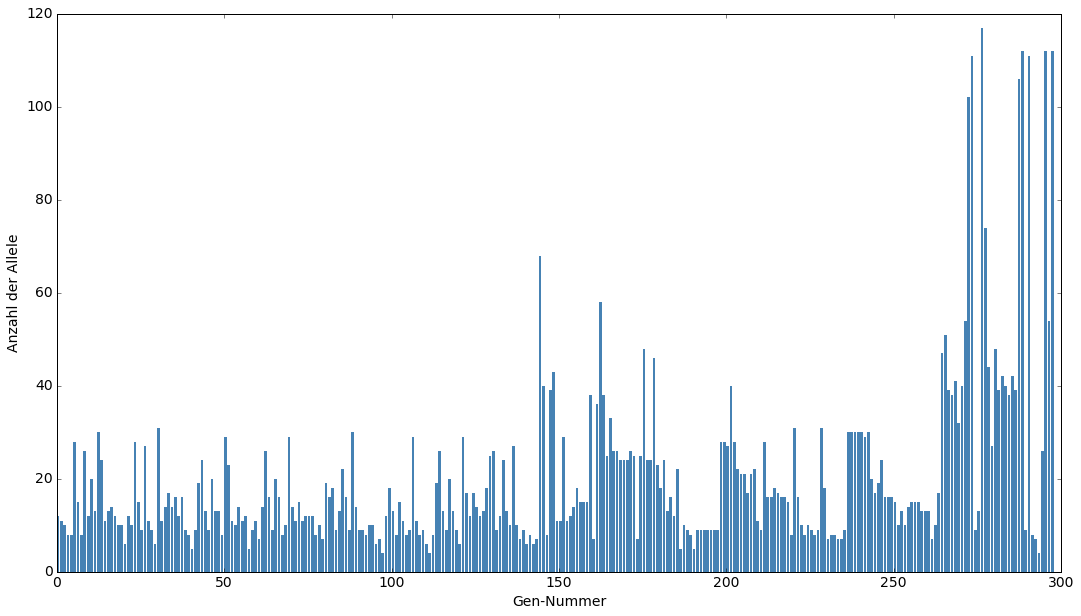

In [82]:
matplotlib.rc('font', size=14)
fig = plt.figure(figsize=(18, 10), dpi=300)    
bars = plt.bar(range(len(variants)),variants,color="steelblue",edgecolor = "none")
#plt.title("Klangzellen-Genom")
plt.xlabel('Gen-Nummer')
plt.ylabel('Anzahl der Allele')
plt.autoscale()
fig.savefig("genom.pdf", bbox_inches='tight', pad_inches=0.0)
plt.show()

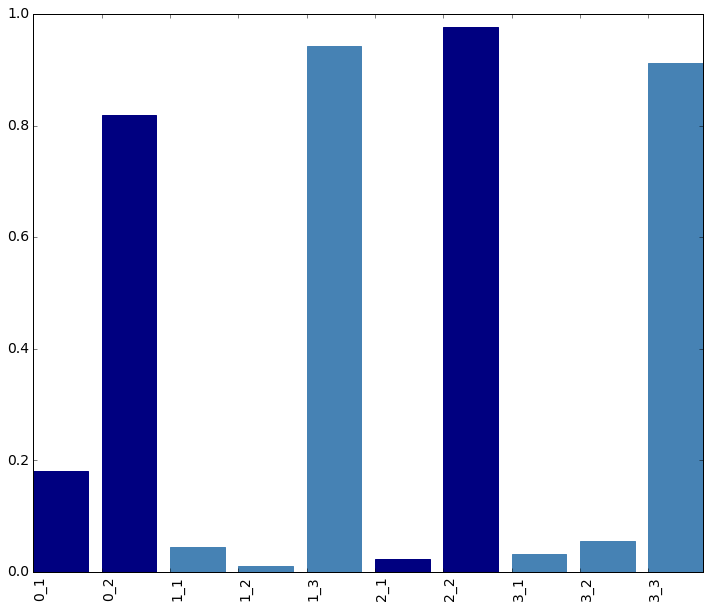

In [250]:
matplotlib.rc('font', size=14)
fig = plt.figure(figsize=(12, 10), dpi=300)

axes = fig.add_subplot(1, 1, 1)

avgGenotype = np.average(genotypes,axis=0)[0:10]
genes = ["A","B","C","D","E","F","G","H"]
labels = []
alphas = []
i = 0
for g in range(len(variants)):
    for a in range(variants[g]):
        labels.append(str(g)+"_"+str(a+1))
        #print "%s\\textsubscript{%i} (%s), " % (genes[g],a+1,("%.3f" % avgGenotype[i]).lstrip('0'))
        i+=1
        if g%2:
            alphas.append("steelblue")
        else:
            alphas.append("navy")
    print ""
        
x_axis = np.arange(len(labels))
bars = plt.bar(range(len(avgGenotype)),avgGenotype)
plt.xticks(x_axis, labels, rotation='90',ha="left")
#ax.xaxis.set_ticks_position('top')

for i,gValue in enumerate(avgGenotype):
    bars[i].set_color(alphas[i])

plt.autoscale()
#plt.savefig("genome.png", dpi=300)
plt.show()

In [310]:

tablestring = ""
for i,group in enumerate(validGroups):
    groupstring = group[0]
    for element in group[1:]:
        groupstring = groupstring + ", " + element

    tablestring = tablestring + "%i & %s & %i \\\\ \n" % (i+1,groupstring,variants[i])

print tablestring

1 & Density, DynamicGlobalLoudness & 2 \\ 
2 & Density, DynamicKurtosis & 3 \\ 
3 & Density, DynamicSkewness & 2 \\ 
4 & Density, FollowingRest & 3 \\ 
5 & Density, HarmonicSpread & 6 \\ 
6 & Density, MelodicComplexity & 13 \\ 
7 & Density, MelodicRoot & 12 \\ 
8 & Density, MelodicShape & 4 \\ 
9 & Density, MelodicSpread & 4 \\ 
10 & Density, RhythmicComplexity & 10 \\ 
11 & Density, RhythmicFlatness & 3 \\ 
12 & Density, RhythmicStability & 2 \\ 
13 & Density, RhythmicTempo & 11 \\ 
14 & Density, RhythmicUniformity & 2 \\ 
15 & Density, SpectralCentroid & 2 \\ 
16 & Density, SpectralFlux & 2 \\ 
17 & Density, ZeroCrossingRate & 2 \\ 
18 & Detuning, DynamicGlobalLoudness & 2 \\ 
19 & Detuning, DynamicKurtosis & 5 \\ 
20 & Detuning, DynamicSkewness & 3 \\ 
21 & Detuning, DynamicSpread & 3 \\ 
22 & Detuning, FollowingRest & 4 \\ 
23 & Detuning, HarmonicSpread & 8 \\ 
24 & Detuning, MelodicComplexity & 14 \\ 
25 & Detuning, MelodicRoot & 12 \\ 
26 & Detuning, MelodicShape & 4 \\ 
27 & Det

In [311]:
f = open('genome-table.tex', "w")
f.write(tablestring)
f.close()

In [54]:
from Bio.Phylo.TreeConstruction import _DistanceMatrix 
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
import Bio.Phylo.TreeConstruction

In [63]:
trackGenotypes = []

recordingDetails = genimpro.recordings.getRecordingDetails(138)

for track in recordingDetails[4]:

    trackGenotypes.append(genimpro.recordings.getGenotypesForTrack(track))


In [64]:
len(trackGenotypes[0])

9

In [9]:
for j,gen in enumerate(trackGenotypes):
    for i,geno in enumerate(gen):
        trackGenotypes[j][i] = geno[0]

In [65]:
names1 = ["P_1 SC_" + str(i) for i in range(len(trackGenotypes[0]))]
names2 = ["P_2 SC_" + str(i) for i in range(len(trackGenotypes[1]))]
names = names1 + names2

In [66]:
phyloGenotypes = trackGenotypes[0]+trackGenotypes[1]

In [67]:
from scipy.spatial import distance
matrix = distance.cdist(phyloGenotypes, phyloGenotypes, 'euclidean')
matrix = matrix/np.amax(matrix)

In [68]:
njmatrix = []
for i,e in enumerate(matrix):
    njmatrix.append(list(e[0:i+1]))
m = _DistanceMatrix (names, njmatrix)
constructor = DistanceTreeConstructor()
tree = constructor.nj(m)
tree.ladderize()


In [69]:
print tree

Tree(rooted=False)
    Clade(branch_length=0, name='Inner26')
        Clade(name='Inner23')
            Clade(name='P_2 SC_5')
            Clade(name='Inner21')
                Clade(name='P_2 SC_7')
                Clade(name='Inner13')
                    Clade(name='P_2 SC_15')
                    Clade(name='P_2 SC_9')
        Clade(name='Inner25')
            Clade(name='Inner24')
                Clade(name='P_2 SC_17')
                Clade(name='Inner20')
                    Clade(name='P_2 SC_16')
                    Clade(name='Inner17')
                        Clade(name='P_2 SC_6')
                        Clade(name='P_2 SC_3')
            Clade(name='Inner19')
                Clade(name='P_2 SC_0')
                Clade(name='Inner18')
                    Clade(name='P_2 SC_13')
                    Clade(name='Inner10')
                        Clade(name='P_2 SC_12')
                        Clade(name='P_2 SC_1')
        Clade(name='Inner22')
            Clade(name='Inner14

In [70]:
for clade in tree.get_nonterminals():
    clade.name=""

In [ ]:
matplotlib.rc('font', size=14)
fig = plt.figure(figsize=(20, 35), dpi=250)

axes = fig.add_subplot(1, 1, 1)

Bio.Phylo.draw(tree,axes=axes,do_show=False)
#plt.savefig("tree.png", dpi=300)

In [139]:
clusterGroups

[['Centroid', 'Inharmonicity', 'SpectralRoughness', 'ZeroCrossingRate'],
 ['Density',
  'RhythmicComplexity',
  'RhythmicFlatness',
  'RhythmicStability',
  'RhythmicTempo',
  'RhythmicUniformity'],
 ['DynamicComplexity',
  'DynamicGlobalLoudness',
  'DynamicKurtosis',
  'DynamicSkewness',
  'DynamicSpread'],
 ['MelodicComplexity', 'MelodicSpread'],
 ['HarmonicSpread',
  'HPCP 0',
  'HPCP 1',
  'HPCP 2',
  'HPCP 3',
  'HPCP 4',
  'HPCP 5',
  'HPCP 6',
  'HPCP 7',
  'HPCP 8',
  'HPCP 9',
  'HPCP 10',
  'HPCP 10'],
 ['Interval 0',
  'Interval 1',
  'Interval 2',
  'Interval 3',
  'Interval 4',
  'Interval 5',
  'Interval 6',
  'Interval 7',
  'Interval 8',
  'Interval 9',
  'Interval 10',
  'Interval 11']]

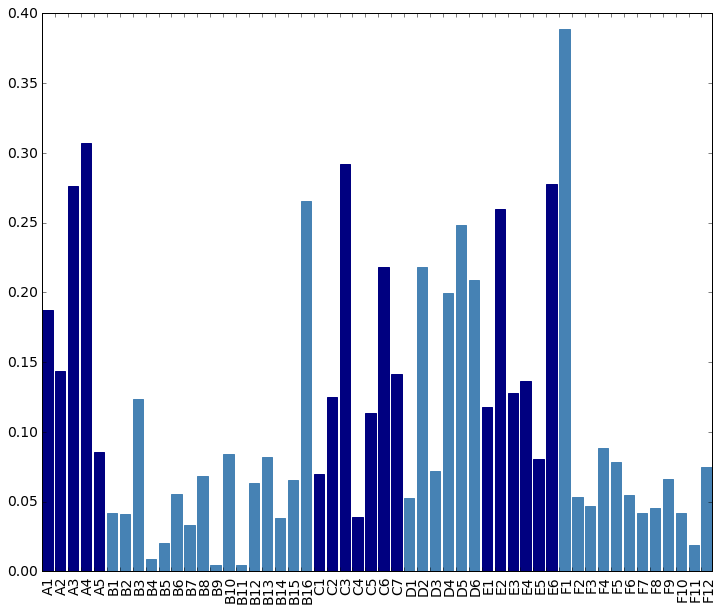

In [37]:
matplotlib.rc('font', size=14)
fig = plt.figure(figsize=(12, 10), dpi=150)

axes = fig.add_subplot(1, 1, 1)

avgGenotype = np.average(genotypes,axis=0)
genes = ["A","B","C","D","E","F","G","H"]
labels = []
alphas = []
i = 0
for g in range(len(variants)):
    for a in range(variants[g]):
        labels.append(genes[g]+str(a+1))
        #print "%s\\textsubscript{%i} (%s), " % (genes[g],a+1,("%.3f" % avgGenotype[i]).lstrip('0'))
        i+=1
        if g%2:
            alphas.append("steelblue")
        else:
            alphas.append("navy")
    print ""
        
x_axis = np.arange(len(labels))
bars = plt.bar(range(len(avgGenotype)),avgGenotype)
plt.xticks(x_axis, labels, rotation='90',ha="left")
#ax.xaxis.set_ticks_position('top')

for i,gValue in enumerate(avgGenotype):
    bars[i].set_color(alphas[i])

plt.autoscale()
#plt.savefig("genome.png", dpi=300)
plt.show()

1


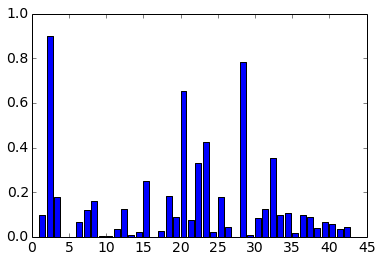

2


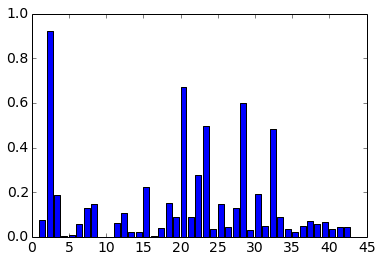

3


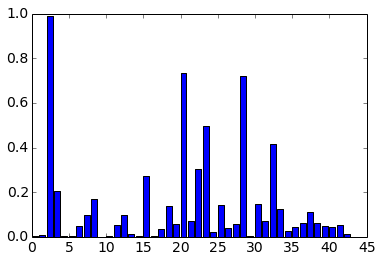

4


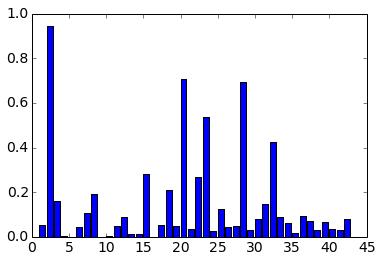

5


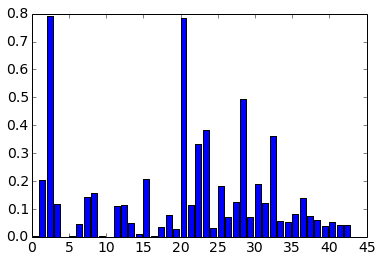

6


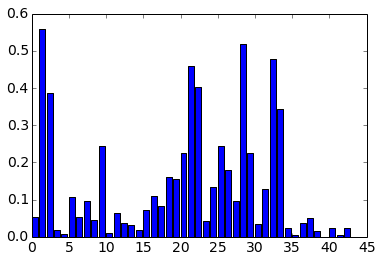

7


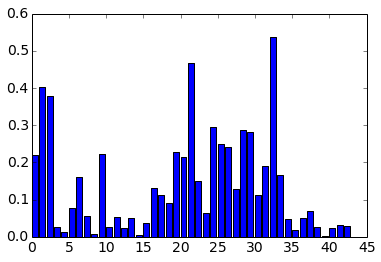

8


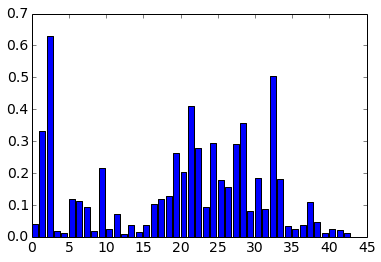

9


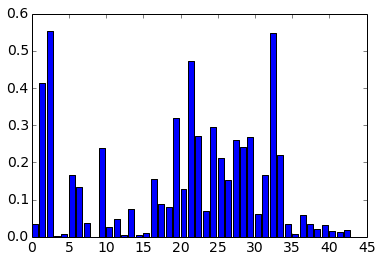

10


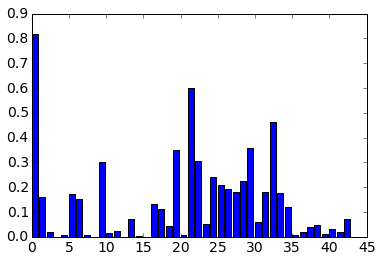

11


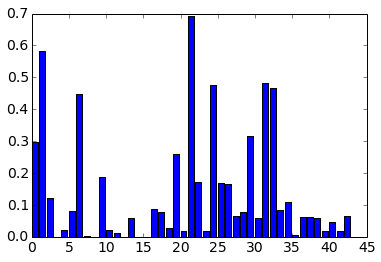

12


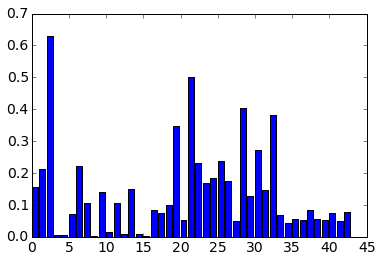

13


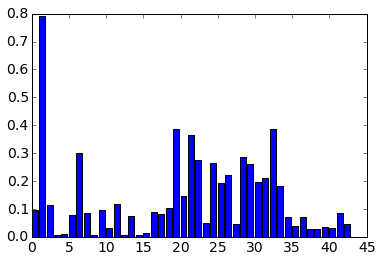

14


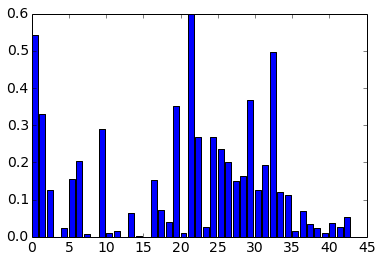

15


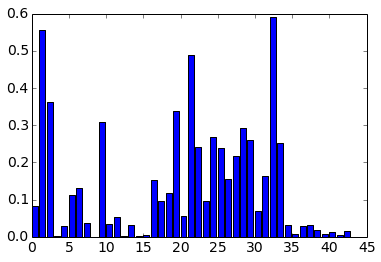

In [70]:
playerGenomes = []
for player in sorted(np.unique(playerIDs)):
    print player
    playerGenotypes = [genotypes[i] for i in range(len(genotypes)) if player == playerIDs[i]]
    avgGenotype = np.average(playerGenotypes,axis=0)

    playerGenomes.append(avgGenotype)
    
    plt.bar(range(len(avgGenotype)),avgGenotype)
    plt.show()

In [205]:
def transformation(genotype1,genotype2):
    return (np.asarray(genotype2) - np.asarray(genotype1))

In [200]:
np.asarray([0, 0, 1, 0, 0, 0, 0, 0, 0, 0]) - np.asarray([1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

array([-1, -1,  0,  0,  0,  0,  0,  0,  0,  0])

In [206]:
alltracks = []
trackTransformations = []
for t in np.unique(trackIDs):
    trackTransformationsN = []
    genotypesInTrack = [g for i,g in enumerate(genotypes) if trackIDs[i]==t]
    for i in range(len(genotypesInTrack)-1):
        transform = transformation(genotypesInTrack[i],genotypesInTrack[i+1])
        trackTransformationsN.append(transform)
        trackTransformations.append(transform)
    alltracks.append(trackTransformationsN)

In [291]:
first20s=[]
for i,transformations in enumerate(alltracks):
    if len(transformations)>20:
        first20s.append(transformations[0:21])


In [301]:
avgFirst20s = np.average(first20s,axis=0)

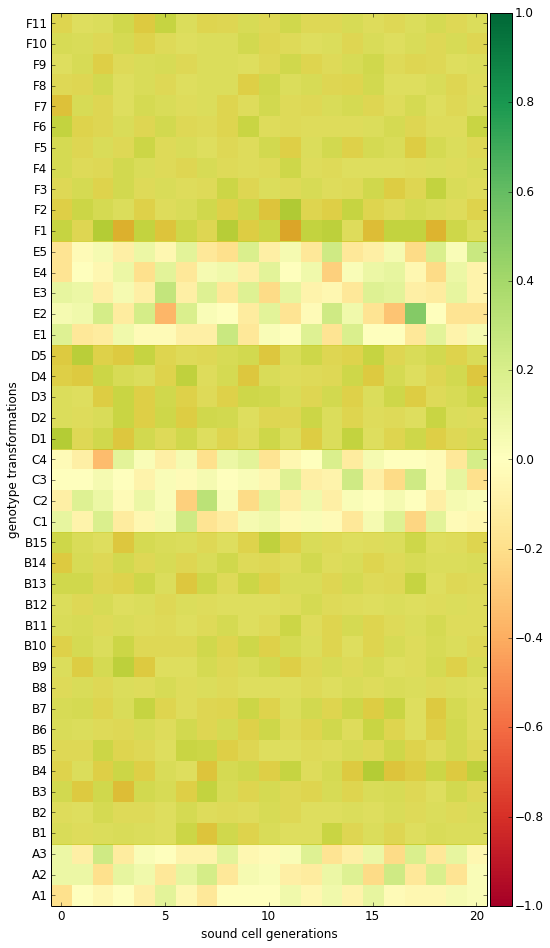

In [302]:
matplotlib.rc('font', size=12)
fig = plt.figure(figsize=(16, 16), dpi=150)
axes = fig.add_subplot(1, 1, 1)

j=0
for g in range(len(variants)):
    if g%2:
        plt.axhspan(j-0.5,j+variants[g]-0.5, color='y', alpha=0.5)
    j+= variants[g]

#avgFirst20s = (avgFirst20s - avgFirst20s.min(0)) / avgFirst20s.ptp(0)

avgFirst20s = avgFirst20s * 5.0

im = plt.imshow(np.asarray(avgFirst20s).T,interpolation='nearest',origin='lower',clim=[-1, 1],
                cmap='RdYlGn')
plt.yticks(x_axis, labels)
plt.xlabel("sound cell generations")
plt.ylabel("genotype transformations")    
#plt.ylim([0,len(labels)])
divider = make_axes_locatable(axes)
cax = divider.append_axes("right", size="5%", pad=0.05)
#plt.autoscale()
plt.colorbar(im, cax=cax)
#plt.savefig("transformpattern.png", dpi=300)
plt.show()

0


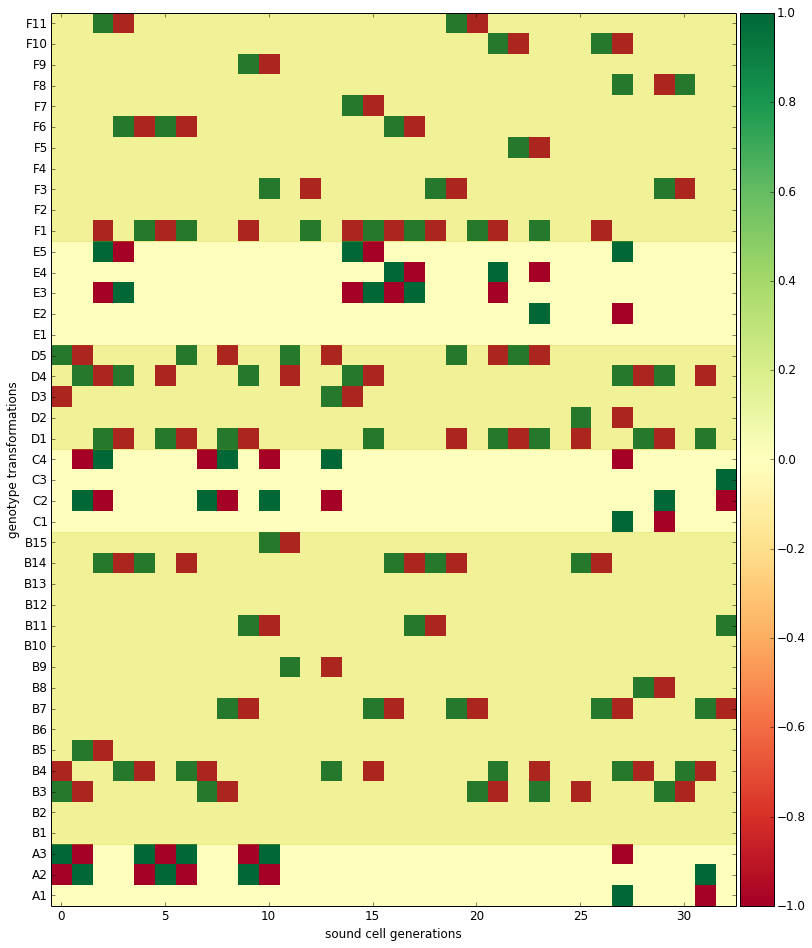

In [279]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors
for i,transformations in enumerate(alltracks[400:401]):
    print i
    matplotlib.rc('font', size=12)
    fig = plt.figure(figsize=(16, 16), dpi=150)
    axes = fig.add_subplot(1, 1, 1)
    
    j=0
    for g in range(len(variants)):
        if g%2:
            plt.axhspan(j-0.5,j+variants[g]-0.5, color='y', alpha=0.2)
        j+= variants[g]
        
    cmap = colors.ListedColormap(['white','black', 'steelblue'])
    cmap.set_under('k', alpha=0)
    bounds=[-1,-0.1,0.1,1]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    im = plt.imshow(np.asarray(transformations).T,interpolation='nearest',origin='lower',clim=[-1, 1],
                    cmap='RdYlGn')
    plt.yticks(x_axis, labels)
    plt.xlabel("sound cell generations")
    plt.ylabel("genotype transformations")    
    #plt.ylim([0,len(labels)])
    divider = make_axes_locatable(axes)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    #plt.autoscale()
    plt.colorbar(im, cax=cax)
    plt.savefig("transformpattern.png", dpi=300)
    plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

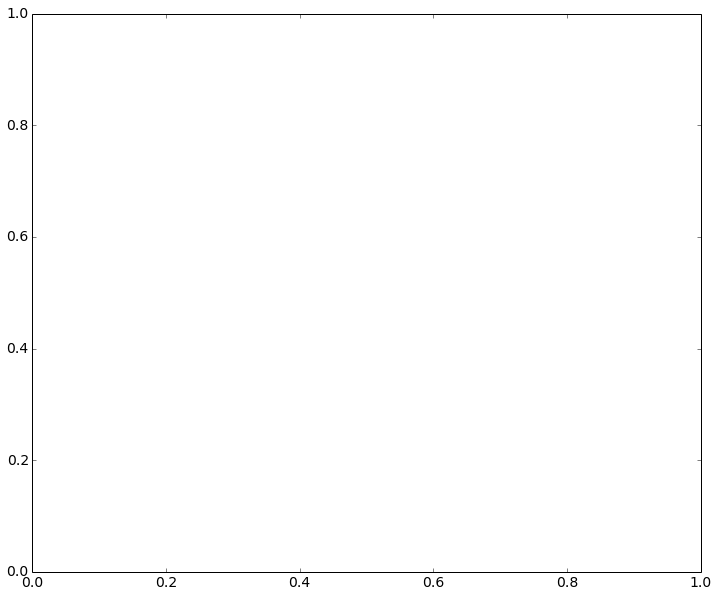

In [295]:
matplotlib.rc('font', size=14)
fig = plt.figure(figsize=(12, 10), dpi=150)
axes = fig.add_subplot(1, 1, 1)

avgTransform = np.average(first20s,axis=0)
genes = ["A","B","C","D","E","F","G","H"]
labels = []
alphas = []
for g in range(len(variants)):
    for a in range(variants[g]):
        labels.append(genes[g]+str(a+1))
        if g%2:
            alphas.append("orange")
        else:
            alphas.append("gold")
        
x_axis = np.arange(len(labels))
bars = plt.bar(range(len(avgTransform)),avgTransform)
plt.xticks(x_axis, labels, rotation='90',ha="left")
#ax.xaxis.set_ticks_position('top')

for i,gValue in enumerate(avgGenotype):
    bars[i].set_color(alphas[i])

plt.grid(True)
plt.autoscale()
#plt.savefig("genome.png", dpi=300)
plt.show()

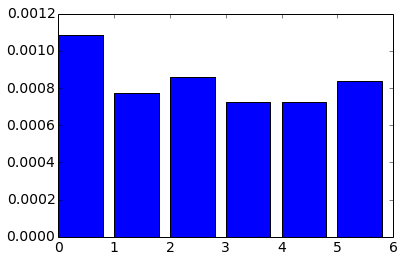

& 0.0011
& 0.0008
& 0.0009
& 0.0007
& 0.0007
& 0.0008
0.000834783260974
0.000124052217642


In [208]:
variantFluct = []
for g in range(len(variants)):
    geneVariants = [np.abs(avgTransform)[a] for a in range(variants[g])]
    variantFluct.append(np.mean(geneVariants))
    
plt.bar(range(len(variantFluct)),variantFluct)
plt.show()
for fluct in variantFluct:
    print "& {:.4f}".format(fluct)
print np.mean(variantFluct)
print np.std(variantFluct)

In [113]:
estimateClusters(np.asarray(trackTransformations))

11042
number of estimated clusters : 1


[array([[ 0,  0,  0, ...,  1,  0, -1],
        [ 0,  0,  0, ...,  1,  0, -1],
        [ 0,  0,  0, ...,  1,  0, -1],
        ..., 
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]])]

In [114]:
len(np.vstack({tuple(row) for row in trackTransformations}))

501

In [120]:
np.prod(variants)

49500

In [133]:
from sklearn.cluster import SpectralClustering

cl = SpectralClustering(n_clusters=5, eigen_solver='arpack')


In [134]:
cl.fit(np.asarray(trackTransformations))

SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
          eigen_solver='arpack', eigen_tol=0.0, gamma=1.0,
          kernel_params=None, n_clusters=5, n_init=10, n_neighbors=10,
          random_state=None)

In [135]:
labels = cl.fit_predict(np.asarray(trackTransformations))

In [138]:
cl

SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
          eigen_solver='arpack', eigen_tol=0.0, gamma=1.0,
          kernel_params=None, n_clusters=5, n_init=10, n_neighbors=10,
          random_state=None)

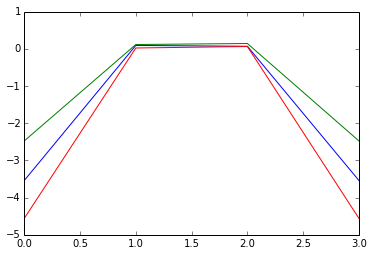

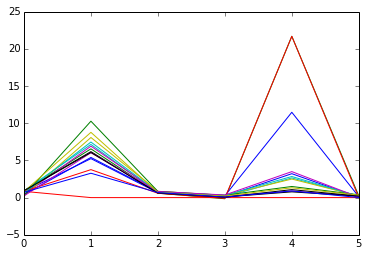

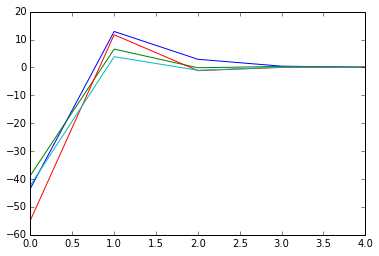

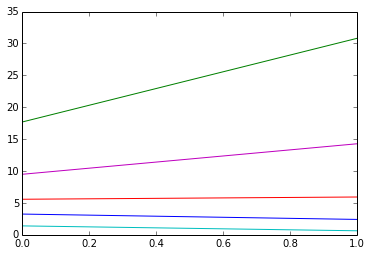

In [246]:
for clusterCenters in clusterCentersForClusterGroups:
    for center in clusterCenters:

        plt.plot(center)
    plt.show()

In [289]:
for i,key in enumerate(keylist):
    print str(i) + ": " + key

0: Centroid
1: Density
2: Detuning
3: DynamicComplexity
4: DynamicGlobalLoudness
5: DynamicKurtosis
6: DynamicSkewness
7: DynamicSpread
8: HPCP 0
9: HPCP 1
10: HPCP 10
11: HPCP 11
12: HPCP 2
13: HPCP 3
14: HPCP 4
15: HPCP 5
16: HPCP 6
17: HPCP 7
18: HPCP 8
19: HPCP 9
20: HarmonicSpread
21: Inharmonicity
22: Interval 0
23: Interval 1
24: Interval 10
25: Interval 11
26: Interval 2
27: Interval 3
28: Interval 4
29: Interval 5
30: Interval 6
31: Interval 7
32: Interval 8
33: Interval 9
34: MelodicComplexity
35: MelodicShape
36: MelodicSpread
37: RhythmicComplexity
38: RhythmicFlatness
39: RhythmicStability
40: RhythmicTempo
41: RhythmicUniformity
42: SpectralFlux
43: SpectralKurtosis
44: SpectralRoughness
45: ZeroCrossingRate


In [258]:
from scipy.spatial import distance
matrix = distance.cdist(normedHPCP, normedHPCP, 'hamming')
#matrix = matrix/np.amax(matrix)



(array([  1.60100000e+03,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          5.17000000e+03,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   3.64200000e+03,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   9.49000000e+02,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

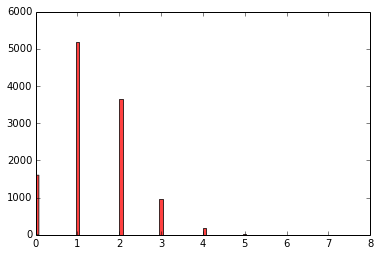

In [290]:
plt.hist(allPhenotypesVect[:,20], 100, normed=0, facecolor='red', alpha=0.75)

In [197]:
intervalValues = np.vstack((allPhenotypesVect[:,21:33]))
#normedIntervals = np.asarray(map(normHPCP, hpcpValues))
len(np.vstack({tuple(row) for row in intervalValues}))

199

In [199]:
estimateClusters(intervalValues)

5170
1601
779
643
544
395
363
268
214
192
120
97
105
66
54
61
47
46
37
43
37
33
34
35
27
27
26
26
26
26
27
27
23
18
17
16
15
15
14
16
14
13
10
10
10
9
10
9
12
8
10
7
7
11
9
9
6
7
7
7
6
6
7
5
5
5
5
5
5
15
number of estimated clusters : 70


[array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 1.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 1.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 1.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 1.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([[ 1.,  1.,  0., ...,  0.,  0.,  0.],
        [ 1.,  1.,  0., ...,  0.,  0.,  0.],
        [ 1.,  1.,  0., ...,  0.,  0.,  0.],
       

In [195]:
if 1 == 1:
    for j,okey in enumerate(keylist):
        for i,key in enumerate(keylist):
            print okey +  " " + key
            estimateClusters(np.vstack((allPhenotypesVect[:,j],allPhenotypesVect[:,i])).T)
            

Centroid Centroid
6015
5564
number of estimated clusters : 2
Centroid Density
5757
4558
761
503
number of estimated clusters : 4
Centroid Detuning
5956
5623
number of estimated clusters : 2
Centroid DynamicComplexity
11579
number of estimated clusters : 1
Centroid DynamicGlobalLoudness
10922
644
13
number of estimated clusters : 3
Centroid DynamicKurtosis
11141
328
35
21
54
number of estimated clusters : 5
Centroid DynamicSkewness
5583
5821
175
number of estimated clusters : 3
Centroid DynamicSpread
6025
5554
number of estimated clusters : 2
Centroid HPCP 0
6104
5475
number of estimated clusters : 2
Centroid HPCP 1
6189
5390
number of estimated clusters : 2
Centroid HPCP 10
6107
5472
number of estimated clusters : 2
Centroid HPCP 11
6059
5520
number of estimated clusters : 2
Centroid HPCP 2
6038
5541
number of estimated clusters : 2
Centroid HPCP 3
5862
5717
number of estimated clusters : 2
Centroid HPCP 4
6025
5554
number of estimated clusters : 2
Centroid HPCP 5
5975
5604
number of e

KeyboardInterrupt: 

### Fuzzy-C-Means

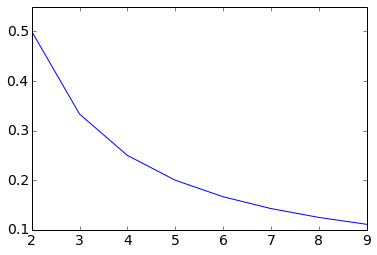

In [127]:
import skfuzzy as fuzz

colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']


k_fpc = []
centers = range(2,10)

for ncenters in centers:
    cntr, u_orig, d, _, _, p, fpc = fuzz.cluster.cmeans(np.asarray(trackTransformations), ncenters, 2, error=0.005, maxiter=1000)
    

    k_fpc.append(fpc)
    

    
plt.plot(centers,k_fpc)

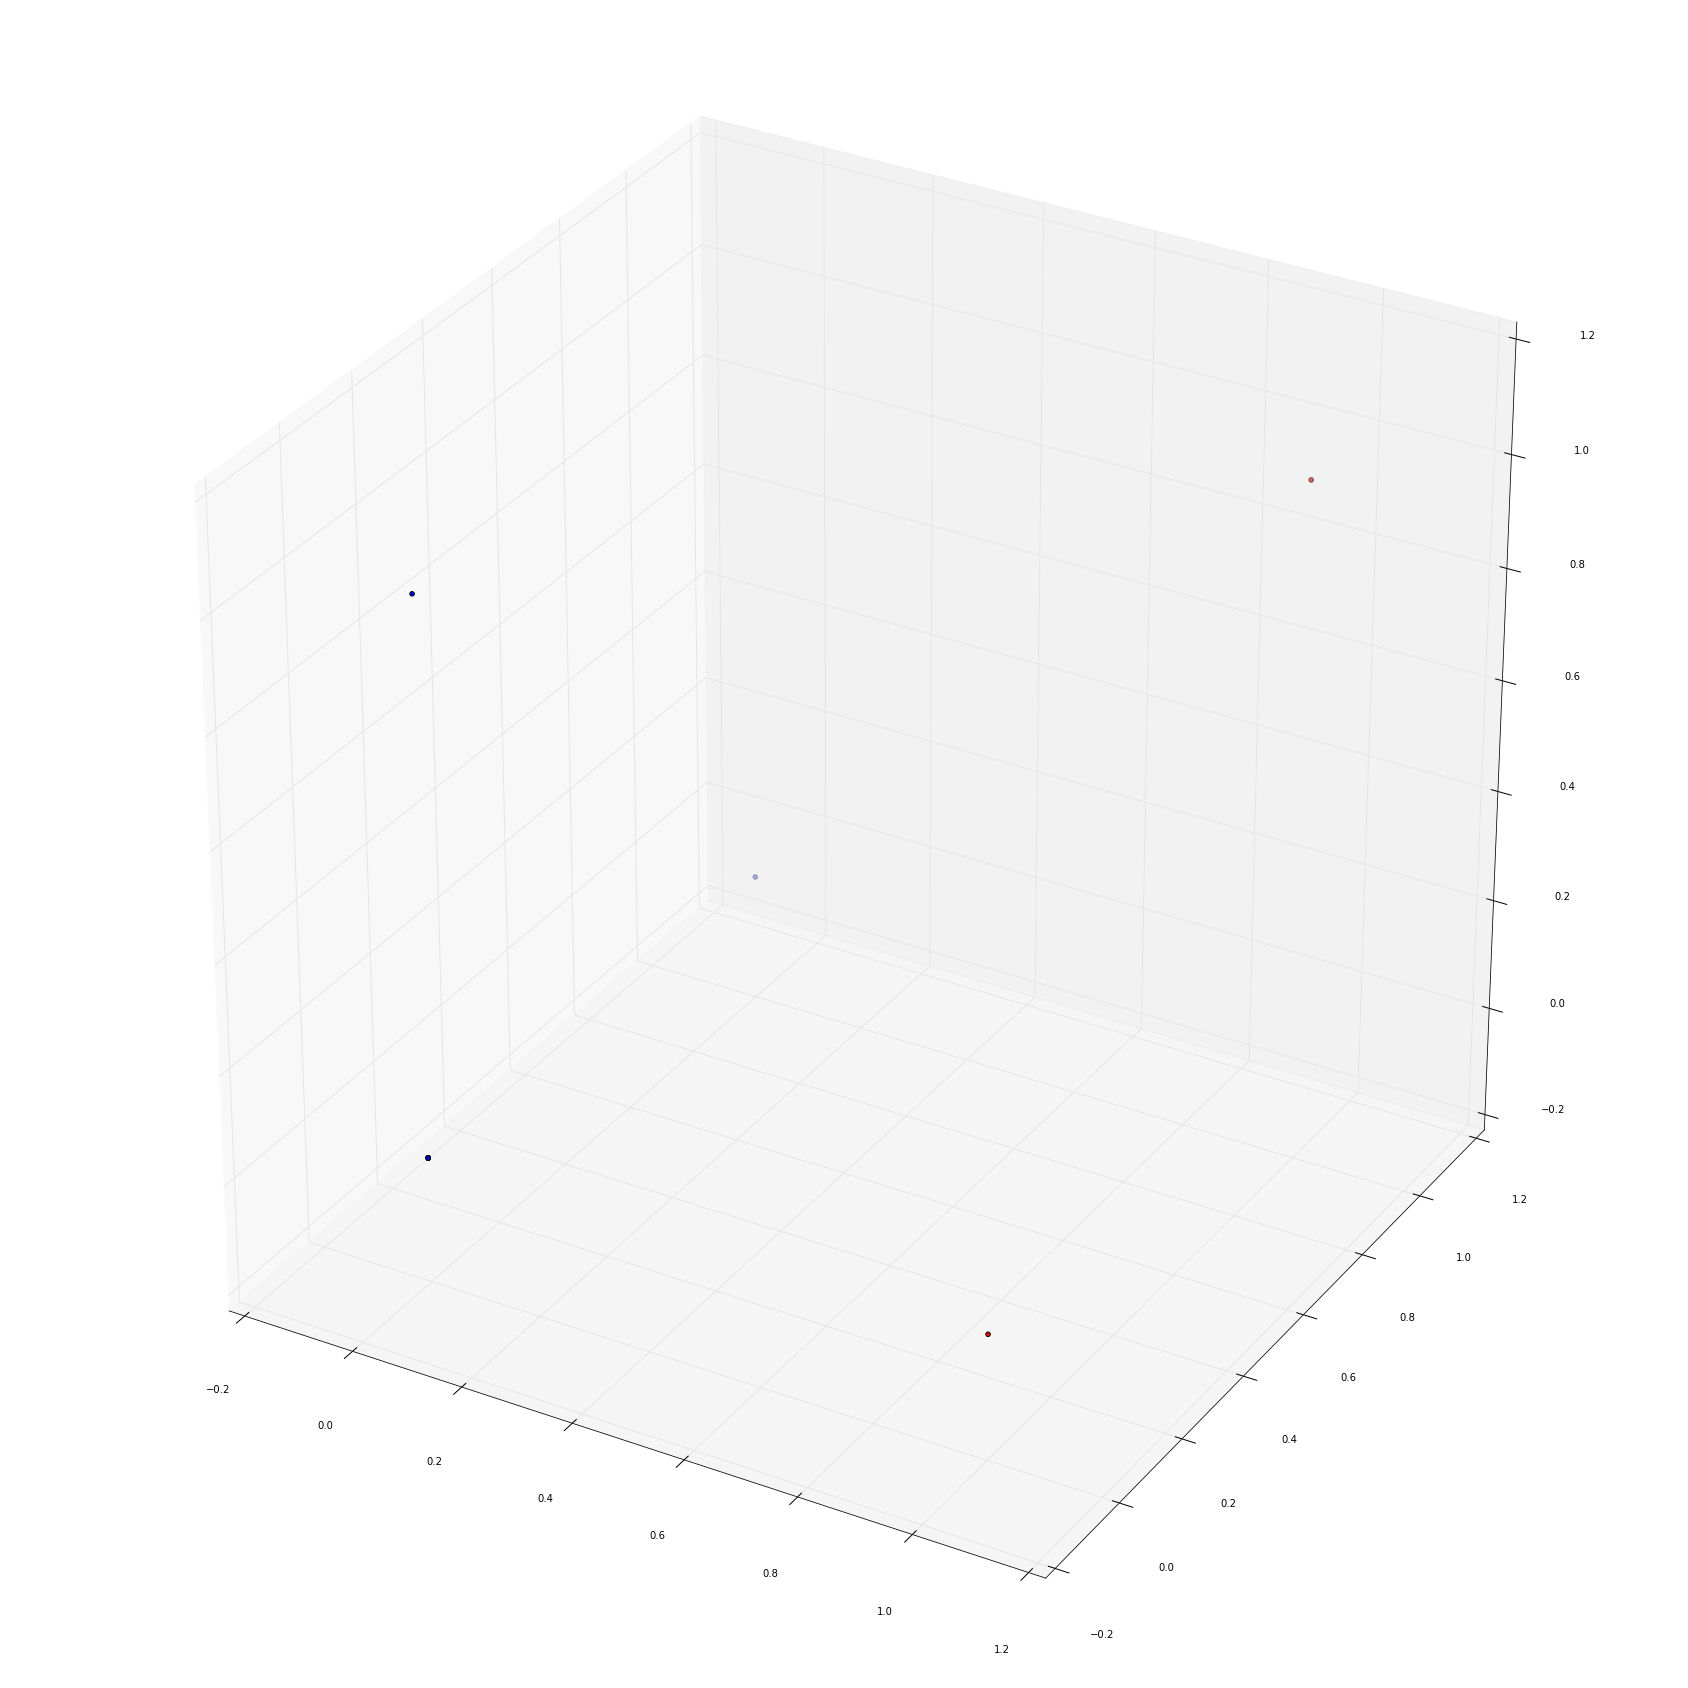

In [214]:
from mpl_toolkits.mplot3d import Axes3D
import skfuzzy as fuzz

alldata = allPhenotypesVect.T

#Density, DynamicComplexity, Loudness

ncenters=8
cntr, u_orig, d, _, _, p, fpc = fuzz.cluster.cmeans(hpcpValues, ncenters, 2, error=0.005, maxiter=1000)
cluster_membership = np.argmax(u_orig, axis=0) 
fig = plt.figure(figsize=(30, 30), dpi=300)
ax = fig.add_subplot(111, projection='3d')

for j in range(ncenters):
    ax.scatter(intervalValues[0, u_orig.argmax(axis=0) == j],
             intervalValues[1, u_orig.argmax(axis=0) == j], 
             intervalValues[2, u_orig.argmax(axis=0) == j], 
             'o',
             c=colors[j],
             label='series ' + str(j))
plt.show()

### K-Means

In [95]:
from sklearn.cluster import KMeans

for i in range(25,30):
    kmeans = KMeans(n_clusters=i).fit(allPhenotypesVect)

    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    inertia = kmeans.inertia_

    print inertia

8771893.35572
8402516.30149
8136901.75658
7718302.29511
7575583.25783


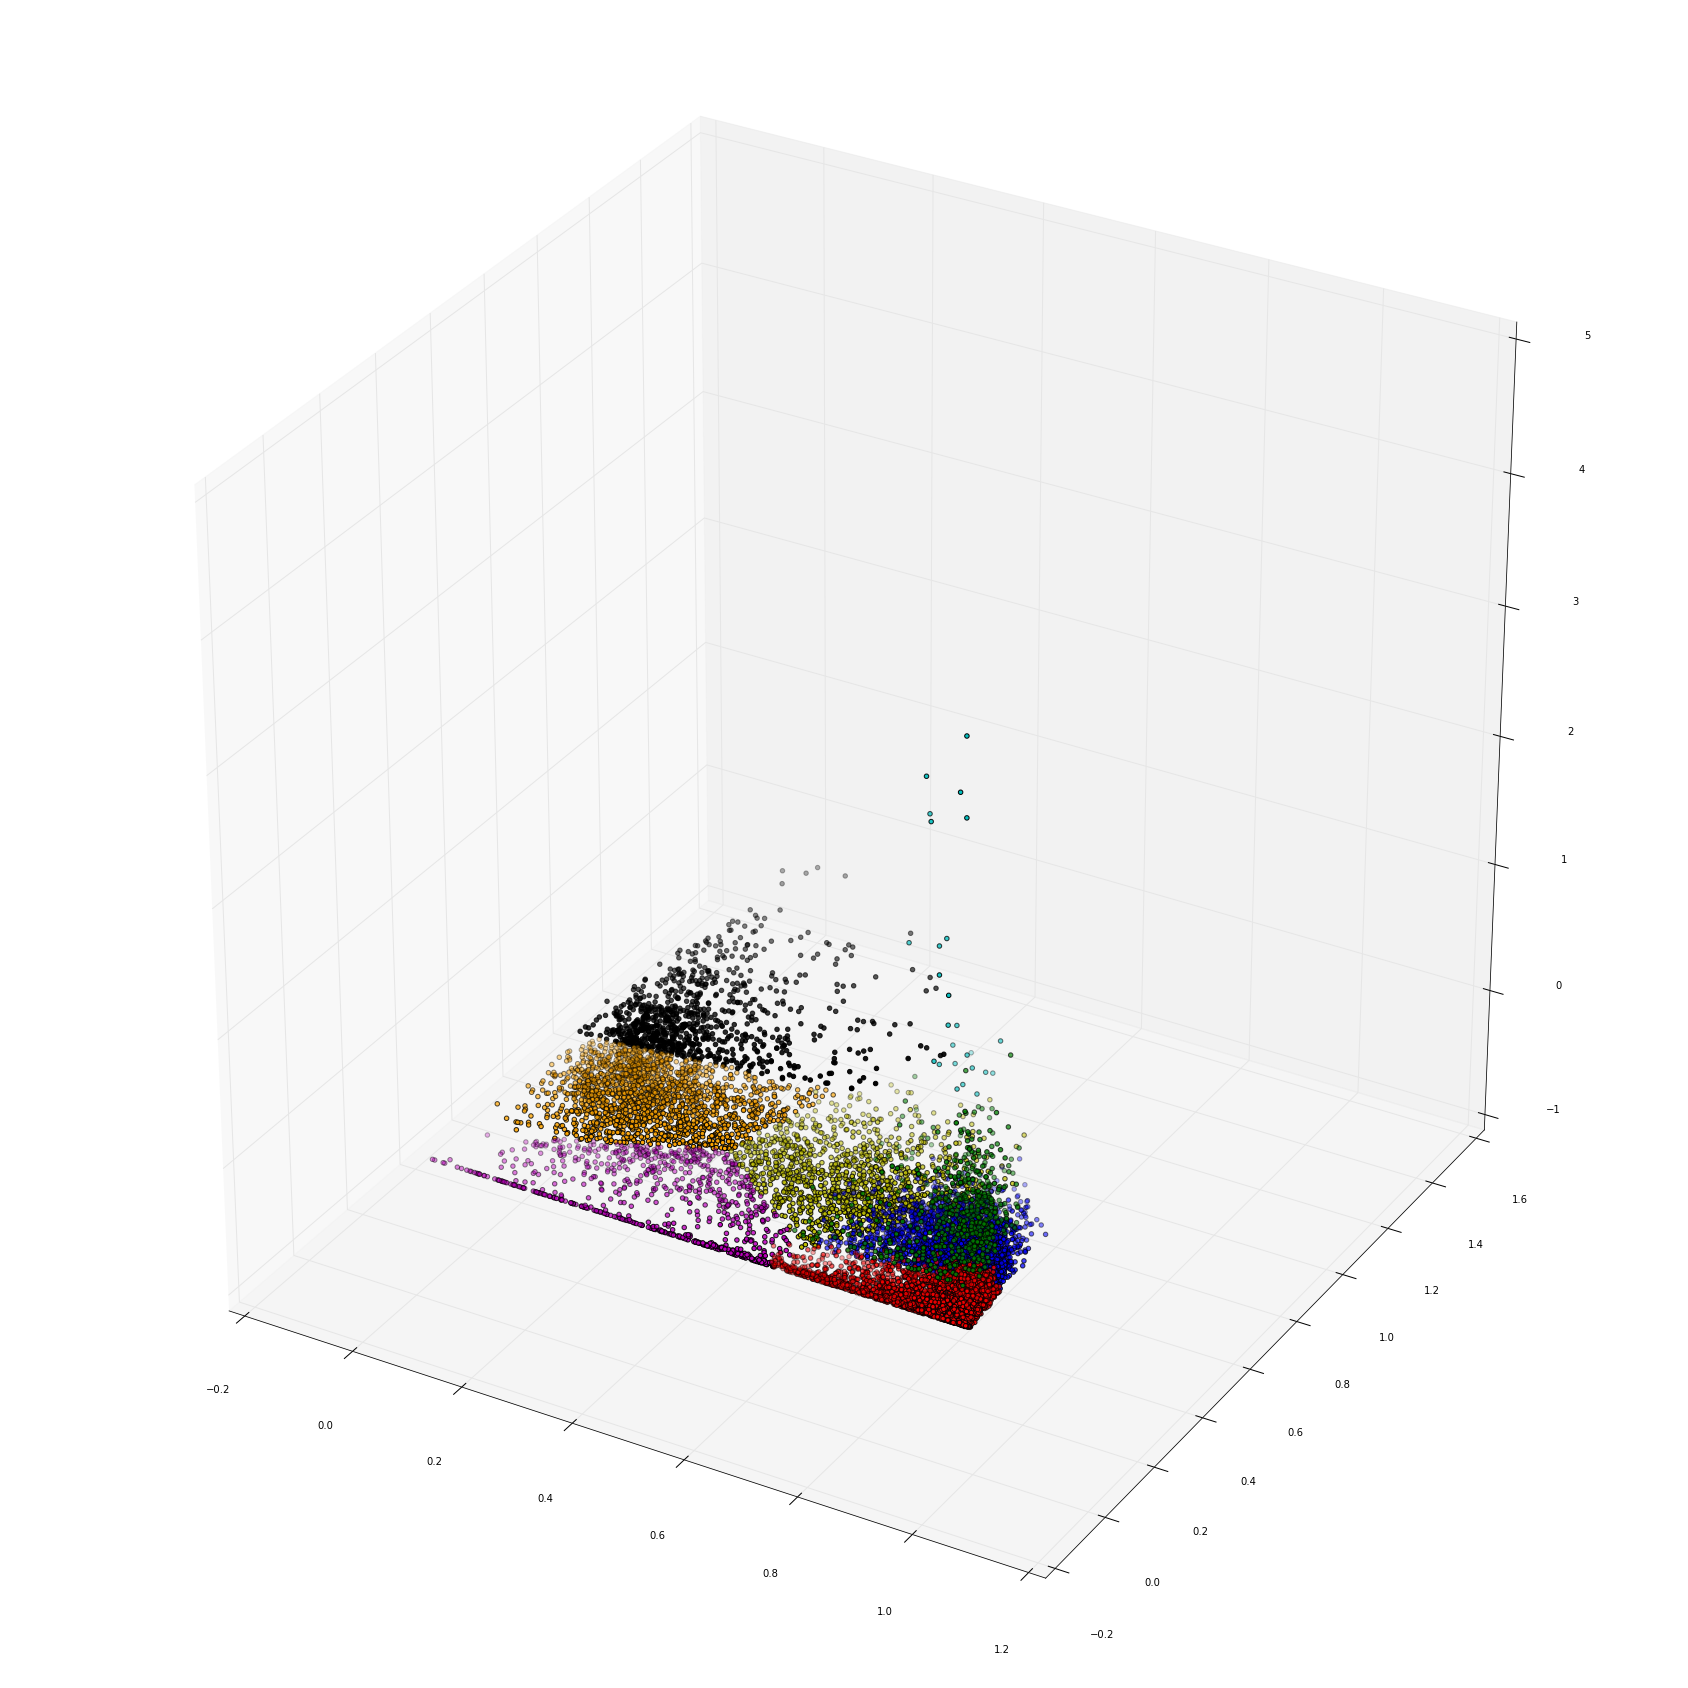

In [15]:
from mpl_toolkits.mplot3d import Axes3D

data = allPhenotypesVect[:,12:15]
vData = np.vstack(data)
ncenters=8
kmeans = KMeans(n_clusters=ncenters).fit(data)
k_means_labels = kmeans.labels_
k_means_cluster_centers = kmeans.cluster_centers_
#k_means_labels_unique = np.unique(k_means_labels)

fig = plt.figure(figsize=(30, 30), dpi=300)
ax = fig.add_subplot(111, projection='3d')

for k in range(ncenters):
    member = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    #ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            #markerfacecolor=col, marker='.')
    
    ax.scatter(data[member,0],
             data[member,1], 
             data[member,2], 
             'o',
             c=colors[k],
             label='series ' + str(j))
plt.show()

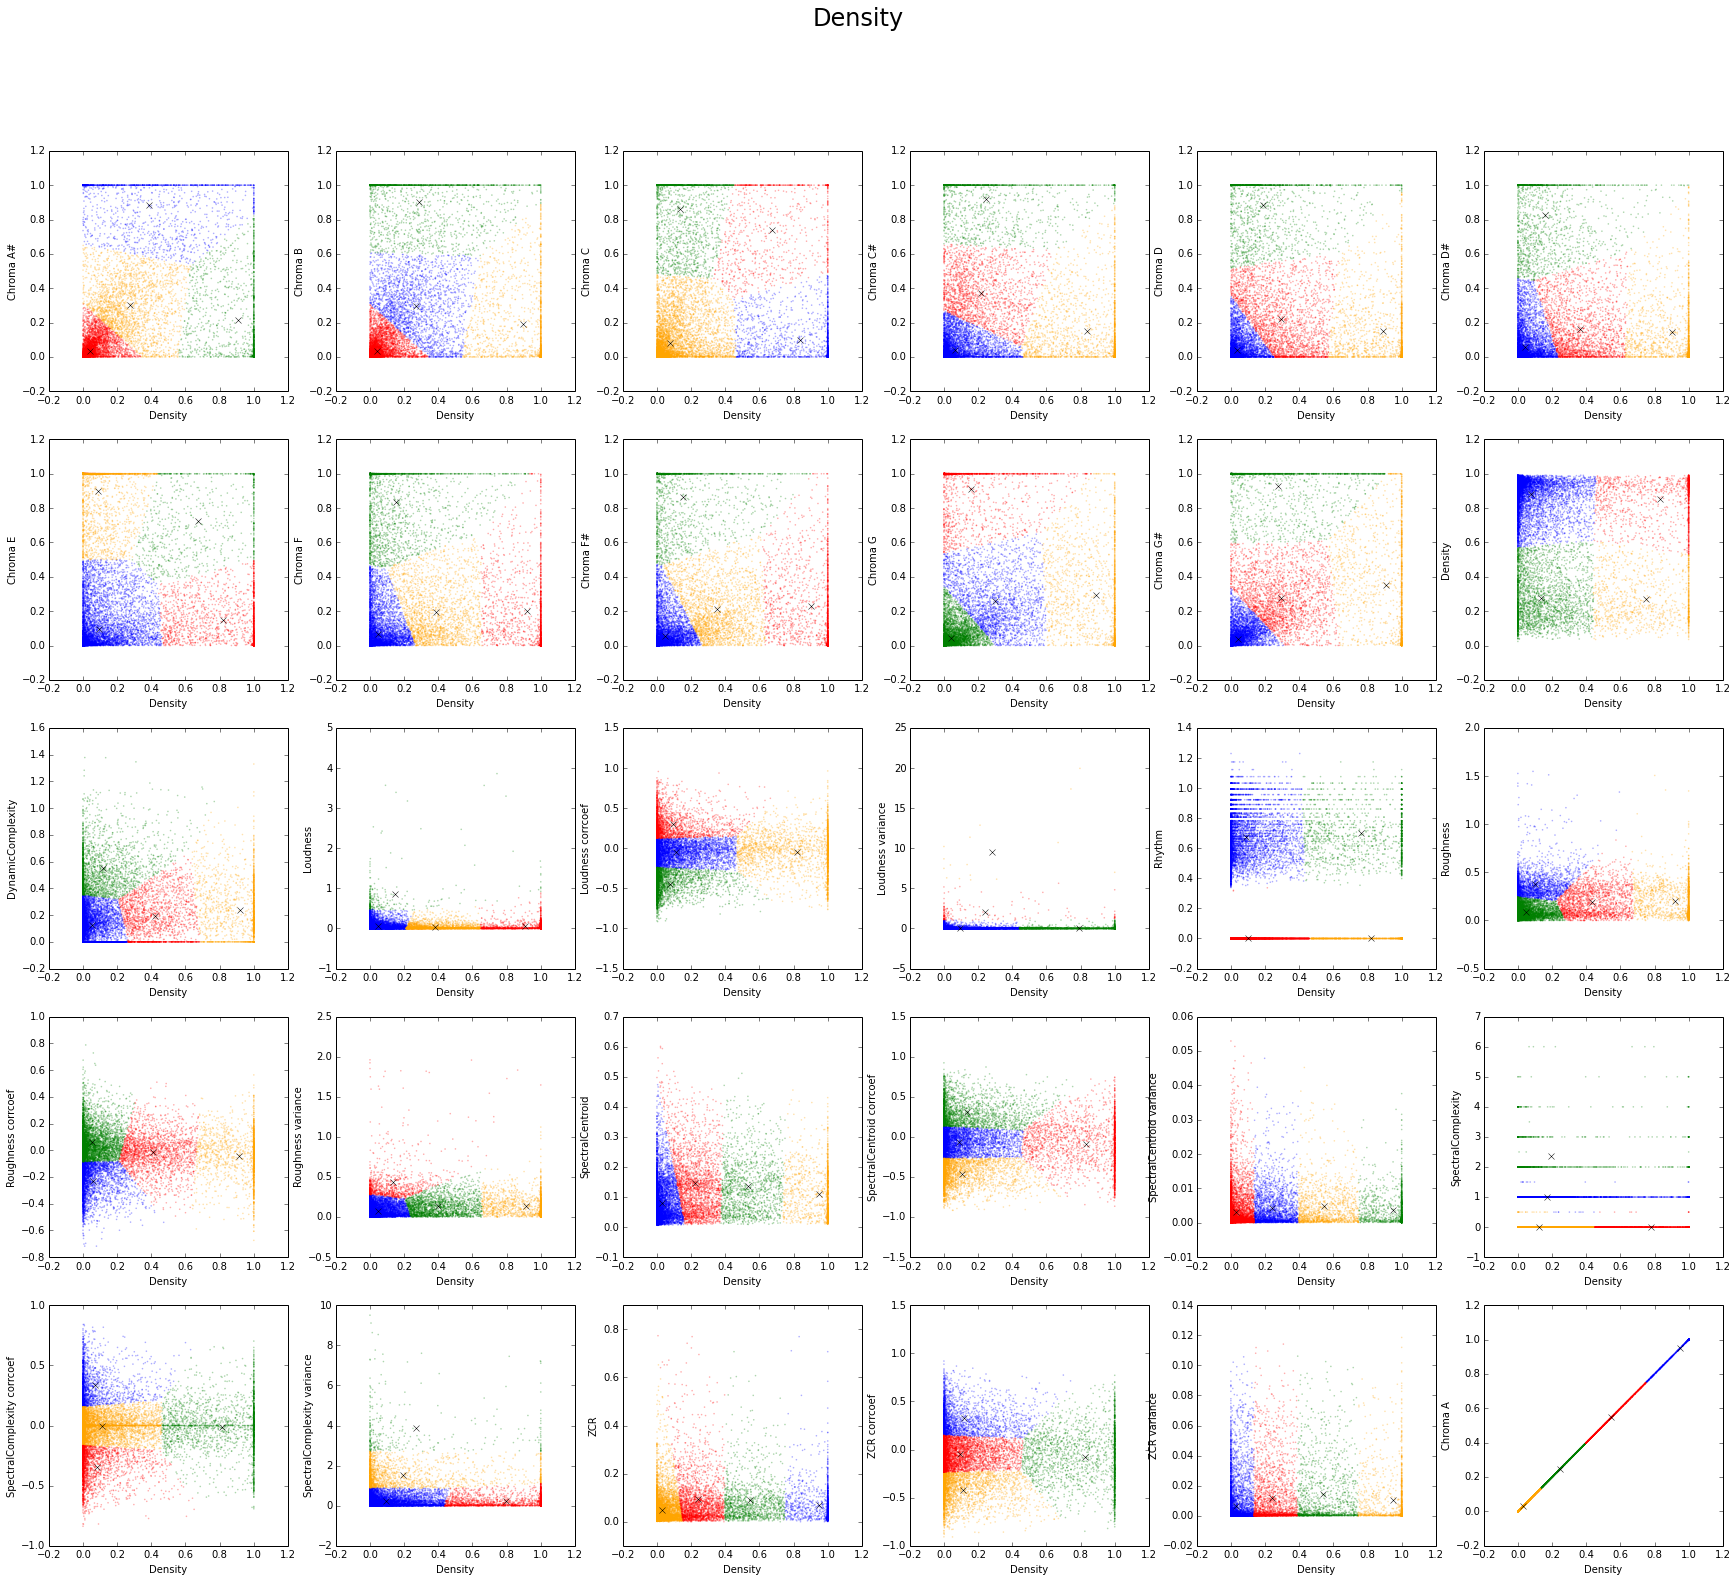

In [16]:
ncenters=4

for j,okey in enumerate(keylist[12:13]):
    fig = plt.figure(figsize=(30, 25), dpi=300)
    fig.suptitle(okey,fontsize=24)
    
    for i,key in enumerate(keylist):
        ax = fig.add_subplot(5,6,i)
        ax.set_xlabel(okey)
        ax.set_ylabel(key)
        
        #data = [,allPhenotypesVect[:,i]]
        
        vData = np.column_stack ((allPhenotypesVect[:,j],allPhenotypesVect[:,i]))
        #print len(data[0])
        kmeans = KMeans(n_clusters=ncenters).fit(vData)
        k_means_labels = kmeans.labels_
        k_means_cluster_centers = kmeans.cluster_centers_
        
        for k in range(ncenters):
            members = k_means_labels == k
            cluster_center = k_means_cluster_centers[k]
            #ax.plot(X[my_members, 0], X[my_members, 1], 'w',
                    #markerfacecolor=col, marker='.')

            #ax.scatter(data[member,0],
            #         data[member,1], 
            #         'o',
            #         c=colors[k])

            ax.plot(cluster_center[0], cluster_center[1], 'x', markerfacecolor=colors[k],
                                            markeredgecolor='k', markersize=6)
            #print data[0:5,1]
            ax.scatter(allPhenotypesVect[members,j],allPhenotypesVect[members,i],color=colors[k],s=0.5,alpha=0.25)
    plt.show()

In [ ]:
import itertools
for i,comb in enumerate(itertools.combinations(range(1,12),3)):
    print i

### EM Clustering

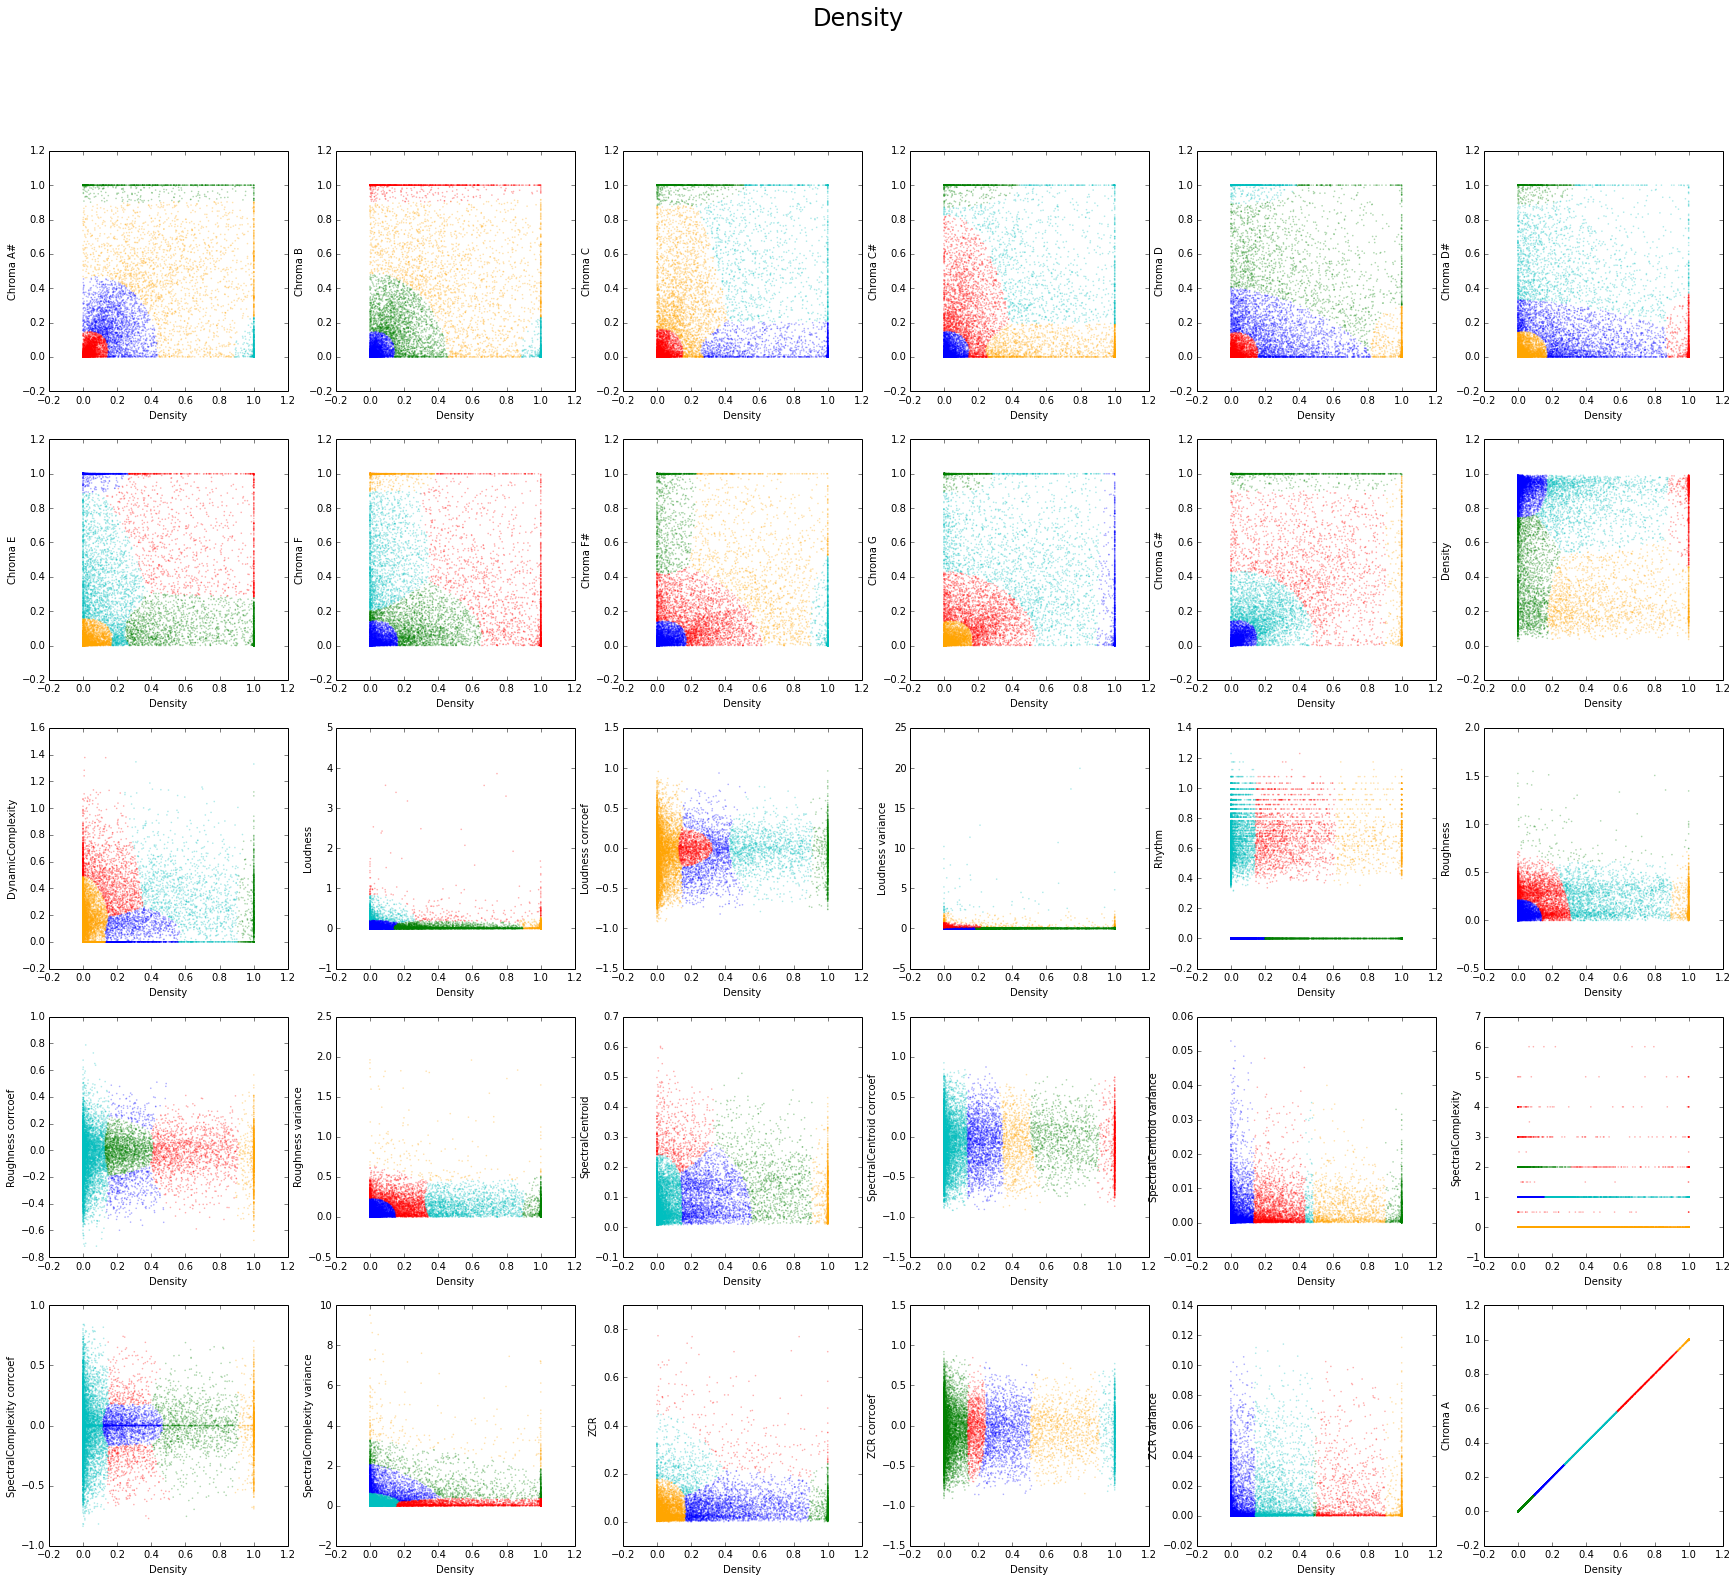

In [22]:
from scipy import linalg
import pylab as pl
import matplotlib as mpl

from sklearn import mixture

data = allPhenotypesVect[:,12:13]

#for n in range(8,20):
#print n


#plt.figure(figsize=(25, 5))
#plt.plot(range(len(cluster_membership)),cluster_membership,lw=0.2)
#plt.show()
    


for j,okey in enumerate(keylist[12:13]):
    fig = plt.figure(figsize=(30, 25), dpi=300)
    fig.suptitle(okey,fontsize=24)
    
    for i,key in enumerate(keylist):
        ax = fig.add_subplot(5,6,i)
        ax.set_xlabel(okey)
        ax.set_ylabel(key)

        data = np.column_stack ((allPhenotypesVect[:,j],allPhenotypesVect[:,i]))
        gmm = mixture.GMM(n_components=5, covariance_type='full')
        gmm.fit(data)

        cluster_membership = gmm.predict(data)
        
        #vData = np.column_stack ((allPhenotypesVect[:,j],allPhenotypesVect[:,i]))

        #kmeans = KMeans(n_clusters=ncenters).fit(vData)
        #k_means_labels = kmeans.labels_
        #k_means_cluster_centers = kmeans.cluster_centers_
        
        for k, (mean, covar) in enumerate(zip(gmm.means_, gmm._get_covars())):
            ax.scatter(allPhenotypesVect[cluster_membership==k,j],allPhenotypesVect[cluster_membership==k,i],color=colors[k],s=0.5,alpha=0.25)
            
    plt.show()


In [139]:
def genomeForSession(sessionID,nGenes=10):
    
    allPhenotypesDicts = []
    
    for recordingID in genimpro.recordings.listRecodings(sessionID):
        recordingDetails = genimpro.recordings.getRecordingDetails(recordingID)
    
    for track in recordingDetails[4]:
        phenotypes = genimpro.recordings.getPhenotypesForTrack(track)
        if type(phenotypes) is list:
            allPhenotypesDicts.extend(phenotypes)
            
    phenotypeArray = []
    keylist = allPhenotypesDicts[0].keys()
    keylist.sort()
    
    for phenotypeDict in allPhenotypesDicts:
        sortedDict = []
        for key in keylist:
            sortedDict.append(phenotypeDict[key])
        phenotypeArray.append(sortedDict)
        
    allPhenotypesVect = np.asarray(phenotypeArray)
    
    where_are_NaNs = isnan(allPhenotypesVect)
    allPhenotypesVect[where_are_NaNs] = 0

    dataByDimension = []

    for dimension in range(0,len(allPhenotypesVect[0]-1)):
        dataByDimension.append([allPhenotypesVect[i][dimension] for i in range(0,len(allPhenotypesVect)-1)])

    alldata = np.vstack((dataByDimension))
        
    cntr, u_orig, d, _, _, p, fpc = fuzz.cluster.cmeans(alldata, nGenes, 1.1, error=0.005, maxiter=1000)
    [u_orig[i][0] for i in range(len(d))]
    
    import sqlite3 as lite
    import json

    db = lite.connect('genImpro.db')
    c = db.cursor()

    genome = json.dumps(cntr.tolist())

    sqlcommand = "INSERT INTO genome (CNTR,sessionID) values (%s,%i)" % (repr(genome),sessionID)
    c.execute(sqlcommand)
    db.commit()

In [140]:
genomeForSession(sessionID)

In [141]:
np.vstack((allPhenotypesVect[0]))

array([[  7.95680135e-02],
       [  2.43667811e-01],
       [  1.36757404e-01],
       [  3.10569972e-01],
       [  2.15294793e-01],
       [  3.84201676e-01],
       [  2.11296618e-01],
       [  3.71655107e-01],
       [  1.00000000e+00],
       [  3.52864027e-01],
       [  1.09644823e-01],
       [  4.12395447e-01],
       [  9.40462024e-01],
       [  1.24455786e-01],
       [  2.81854915e-02],
       [  1.49881823e-01],
       [  4.97175952e-04],
       [  7.53791428e-01],
       [  5.50568104e-01],
       [ -3.88116164e-02],
       [  9.77454191e-01],
       [  2.58442521e-01],
       [ -4.75810269e-01],
       [  4.76178796e-04],
       [  0.00000000e+00],
       [ -1.99200823e-01],
       [  1.59005532e-01],
       [  2.46093750e-01],
       [ -3.04329689e-02],
       [  1.78701467e-03]])

In [149]:
u_predict, d, _, _, p, fpc = fuzz.cluster.cmeans_predict(np.vstack(allPhenotypesVect[0]), cntr, 3, error=0.005, maxiter=1000)

In [150]:
u_predict.flatten()

array([ 0.0790041 ,  0.08057308,  0.02568618,  0.03600923,  0.01606373,
        0.05539819,  0.10423932,  0.105435  ,  0.07956877,  0.06076088,
        0.08641681,  0.08228119,  0.10948749,  0.07907603])

In [133]:
import sqlite3 as lite
import json

db = lite.connect('genImpro.db')
c = db.cursor()

In [97]:
genome = json.dumps(cntr.tolist())

In [108]:
meta = c.execute("PRAGMA table_info('genome')")
for r in meta:
    print r

(0, u'ID', u'INTEGER', 1, None, 1)
(1, u'CNTR', u'TEXT', 0, None, 0)
(2, u'sessionID', u'INTEGER', 0, None, 0)


In [109]:
sqlcommand = "INSERT INTO genome (CNTR,sessionID) values (%s,%i)" % (repr(genome),sessionID)
c.execute(sqlcommand)
db.commit()

In [134]:
def getGenome(sessionID):
    sqlcommand = "SELECT CNTR FROM genome where sessionID=%i order by ID desc LIMIT 1 " % (sessionID)
    c.execute(sqlcommand)
    data = c.fetchone()

    return np.asarray(json.loads(data[0]))

In [144]:
newGenome = getGenome(sessionID)

In [145]:
u_predict, d, _, _, p, fpc = fuzz.cluster.cmeans_predict(np.vstack(allPhenotypesVect[0]), newGenome, 2, error=0.005, maxiter=1000)

In [146]:
u_predict

array([[ 0.11584402],
       [ 0.10101025],
       [ 0.11809936],
       [ 0.10288762],
       [ 0.07845   ],
       [ 0.08427627],
       [ 0.13135583],
       [ 0.10931993],
       [ 0.09311982],
       [ 0.06563691]])

In [160]:
def genotypeForSequence(phenotype,genome):
    where_are_NaNs = isnan(phenotype)
    phenotype[where_are_NaNs] = 0
    u_predict, d, _, _, p, fpc = fuzz.cluster.cmeans_predict(np.vstack(phenotype), genome, 2, error=0.005, maxiter=1000)
    return u_predict.flatten()

In [161]:
genotypeForSequence(allPhenotypesVect[0],newGenome)

array([ 0.11584402,  0.10101025,  0.11809936,  0.10288762,  0.07845   ,
        0.08427627,  0.13135583,  0.10931993,  0.09311982,  0.06563691])

In [26]:
recordingDetails = genimpro.recordings.getRecordingDetails(93)
phenotypes = genimpro.recordings.getPhenotypesForTrack(recordingDetails[4][0])

In [27]:
genotypes = genimpro.genotypesForSequences(phenotypes)

In [28]:
meta = c.execute("PRAGMA table_info('tracks')")
for r in meta:
    print r

(0, u'ID', u'INTEGER', 1, None, 1)
(1, u'recordingID', u'INTEGER', 0, None, 0)
(2, u'playerID', u'INTEGER', 0, None, 0)
(3, u'audiofile', u'TEXT', 0, None, 0)
(4, u'sonicevents', u'TEXT', 0, None, 0)


In [29]:
def getRecordingIDforTrack(track):
    sqlcommand = "SELECT recordingID FROM tracks where ID=%i" % (track[3])
    c.execute(sqlcommand)
    data = c.fetchone()
    return data[0]

In [30]:
recordingID = getRecordingIDforTrack(recordingDetails[4][0])
recordingDetails = genimpro.recordings.getRecordingDetails(recordingID)

In [31]:
recordingTracks = recordingDetails[4]
print recordingTracks

[[u'Marius Werner', u'snaredrum', u'1/f199ef77-778a-4fa5-9326-f377388687a8.aiff', 1, 93], [u'Felix Bratfisch', u'snaredrum', u'1/25a85c12-3e51-4aec-9e20-e4643d2dc31d.aiff', 2, 93]]


In [32]:
def getSequenceIDsForTrack(track):
    sqlcommand = "SELECT ID,start,end FROM sequences where trackID=%i" % (track[3])
    c.execute(sqlcommand)
    data = c.fetchall()

    if data is None:
        return None

    sequences = []
    
    for sequence in data:
        sequence = list(sequence)
        sequence.append(track[3])
        sequences.append(sequence)
        
    return sequences

In [33]:
sequenceData = getSequenceIDsForTrack(recordingDetails[4][0])
print sequenceData

[[11459, 510928, 633320, 1], [11460, 633320, 674320, 1], [11461, 674320, 726948, 1], [11462, 726948, 843328, 1], [11463, 843328, 932812, 1], [11464, 932812, 1010644, 1], [11465, 1010644, 1154104, 1], [11466, 1154104, 1207900, 1], [11467, 1207900, 1257608, 1], [11468, 1257608, 1297372, 1], [11469, 1297372, 1438696, 1], [11470, 1438696, 1512872, 1], [11471, 1512872, 1597916, 1], [11472, 1597916, 1629652, 1], [11473, 1629652, 1682348, 1], [11474, 1682348, 1725060, 1], [11475, 1725060, 1871380, 1], [11476, 1871380, 1924616, 1], [11477, 1924616, 1988680, 1], [11478, 1988680, 2037212, 1], [11479, 2037212, 2075116, 1], [11480, 2075116, 2150756, 1], [11481, 2150756, 2214596, 1], [11482, 2214596, 2233312, 1], [11483, 2233312, 2260496, 1], [11484, 2260496, 2319364, 1], [11485, 2319364, 2338756, 1], [11486, 2338756, 2378620, 1], [11487, 2378620, 2397128, 1], [11488, 2397128, 2536896, 1], [11489, 2536896, 2580868, 1], [11490, 2580868, 2711960, 1], [11491, 2711960, 2748324, 1], [11492, 2748324, 283

In [34]:
def prepareDataForRelations(trackID):
    recordingID = getRecordingIDforTrack(track)
    recordingDetails = genimpro.recordings.getRecordingDetails(recordingID)
    recordingTracks = recordingDetails[4]
    
    genotypes = []
    sequenceData = []
    
    for track in recordingTracks:
        genotypes.extend(genimpro.recordings.getGenotypesForTrack(track))
        sequenceData.extend(getSequenceIDsForTrack(track))
    
    return (genotypes,sequenceData)

In [35]:
(genotypes,sequenceData) = prepareDataForRelations(recordingDetails[4][0])

UnboundLocalError: local variable 'track' referenced before assignment

In [ ]:
len(genimpro.recordings.getGenotypesForTrack(recordingDetails[4][0]))

In [ ]:
from scipy.spatial import distance

def calculateRelationsForGenotypes(genotypes,sequenceData,t_fitness=0.2,n_relations=10):
    matrix = distance.cdist(genotypes, genotypes, 'euclidean')
    matrix = matrix/np.amax(matrix)
    
    relations = []
    
    for i in range(len(genotypes)):
        relation = {}
        
        sorted_distances_indices = np.argsort(matrix[i])
        relation["children"] = []
        relation["parents"] = []
        
        for n in range(1,len([x for x in matrix[i] if x<t_fitness])):
            sequenceIndex = sorted_distances_indices[n]

            if sequenceData[i][2] < sequenceData[sequenceIndex][1]:
                relation["children"].append([sequenceData[sequenceIndex][0],1-matrix[i][sequenceIndex]])
            else:
                relation["parents"].append([sequenceData[sequenceIndex][0],1-matrix[i][sequenceIndex]])

        relation["fitness"] = len(relation["children"])

        relations.append(relation)
    
    return relations
    

In [ ]:
relations = calculateRelationsForGenotypes(genotypes,sequenceData)

In [ ]:
relations

In [ ]:
[phenotypes[i].update(relations[i]) for i in range(len(phenotypes))]